## Projektna naloga PR

Člani ekipe: **Bian Klančnik, Tadej Ločniškar, Gal Lindič, Jan Weissenbach, Ožbej Golob**

### Priprava podatkov

In [1]:
from csv import DictReader
data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
slovar_m = dict()
slovar_z = dict()
slovar_m['manj'] = 0
slovar_z['manj'] = 0
slovar_m['vec'] = 0
slovar_z['vec'] = 0
for row in data:
    if row['Povzrocitelj'] == 'POVZROCITELJ':
        if row['Spol'] == 'MOSKI':
            if row['VrednostAlkotesta'].strip(',') < '50' and row['VrednostAlkotesta'].strip(',') != 0:
                slovar_m['manj'] += 1
            elif row['VrednostAlkotesta'].strip(',') >= '50':
                slovar_m['vec'] += 1
        else:
            if row['VrednostAlkotesta'].strip(',') < '50' and row['VrednostAlkotesta'].strip(',') != 0:
                slovar_z['manj'] += 1
            elif row['VrednostAlkotesta'].strip(',') >= '50':
                slovar_z['vec'] += 1
                
vsi = slovar_m['manj'] + slovar_m['vec'] + slovar_z['manj'] + slovar_z['vec']
moški_procent = (slovar_m['manj'] + slovar_m['vec']) / vsi
print("Odstotek vseh nesreč, kjer ima alkohol v krvi moški:", round(moški_procent * 100, 1))

Odstotek vseh nesreč, kjer ima alkohol v krvi moški: 72.6


In [3]:
vec_vsi = slovar_m['vec'] + slovar_z['vec']
manj_vsi = slovar_m['manj'] + slovar_z['manj']
slovar_m['manj'] = slovar_m['manj'] / manj_vsi
slovar_z['manj'] = slovar_z['manj'] / manj_vsi
slovar_m['vec'] = slovar_m['vec'] / vec_vsi
slovar_z['vec'] = slovar_z['vec'] / vec_vsi

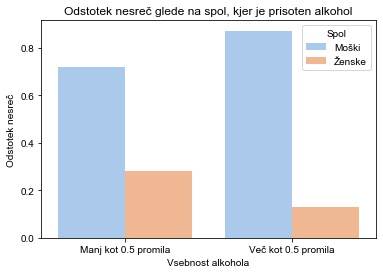

In [4]:
moski = pd.DataFrame({'Vsebnost alkohola':['Manj kot 0.5 promila', 'Več kot 0.5 promila'],'Odstotek nesreč':[i for i in slovar_m.values()]})
zenske = pd.DataFrame({'Vsebnost alkohola':['Manj kot 0.5 promila', 'Več kot 0.5 promila'],'Odstotek nesreč':[i for i in slovar_z.values()]})
moski['Spol'] = 'Moški'
zenske['Spol'] = 'Ženske'
res = pd.concat([moski,zenske])
sns.barplot(x = 'Vsebnost alkohola', y = 'Odstotek nesreč', data = res, hue = 'Spol', palette='pastel').set_title('Odstotek nesreč glede na spol, kjer je prisoten alkohol')
sns.set(rc={'figure.figsize':(14,9)})
plt.show()

Iz grafa lahko razberemo, da so za nesreče, kjer je prisoten alkohol, v večini krivi moški. V primeru, kjer ima povzročitelj v krvi več kot 0.5 promila alkohola, je moških več kot 80%. Naša začetna trditev je tako potrjena.

Odstotek nesreč glede na narodnost povzročitelja. Pričakujemo lahko, da bo večina ljudi Slovencev.

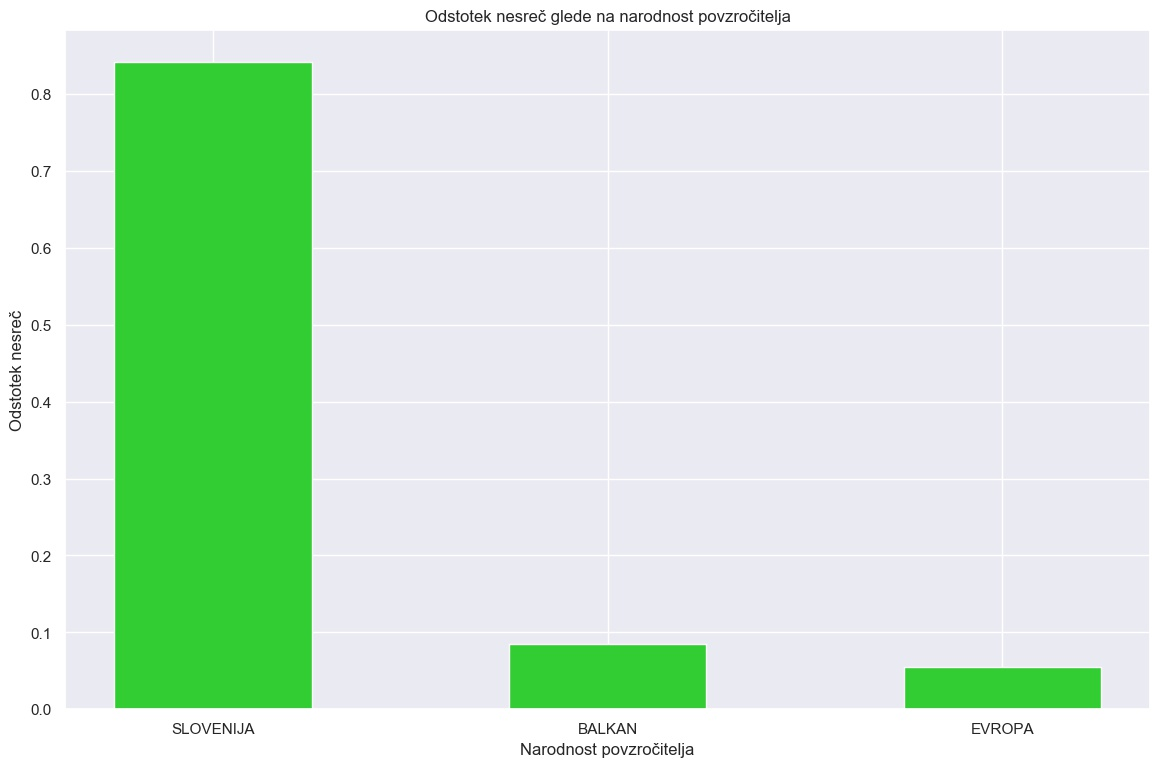

In [5]:
zacetni = dict()
vsi = 0
evropa = ['MADZARSKA', 'NEMCIJA', 'UKRAJINA','ITALIJA','BOLGARIJA','AVSTRIJA','FRANCIJA','SLOVASKA','LATVIJA',
          'VELIKA BRITANIJA','POLJSKA','GRCIJA','CESKA REPUBLIKA','NIZOZEMSKA','SVICA','SPANIJA',
          'SVEDSKA','PORTUGALSKA','BELGIJA','LITVA','IRSKA','LUKSEMBURG','ESTONIJA', 'MOLDAVIJA']
balkan = ['SRBIJA','SEVERNA MAKEDONIJA','HRVASKA', 'BOSNA IN HERCEGOVINA','TURCIJA','CRNA GORA','KOSOVO','ALBANIJA']
for row in data:
    if row['Povzrocitelj'] == 'POVZROCITELJ':
        vsi = vsi + 1
        if row['Drzavljanstvo'] not in zacetni.keys():
            zacetni[row['Drzavljanstvo']] = 1
        else:
            zacetni[row['Drzavljanstvo']] += 1
narodnosti = dict()
narodnosti['SLOVENIJA'] = 0
narodnosti['BALKAN'] = 0
narodnosti['EVROPA'] = 0
for key, value in zacetni.items():
    if key in evropa:
        narodnosti['EVROPA'] += value
    elif key in balkan:
        narodnosti['BALKAN'] += value
    elif key == 'SLOVENIJA':
        narodnosti['SLOVENIJA'] = value
for key, value in narodnosti.items():
    narodnosti[key] = value / vsi
plt.figure(dpi=100)
plt.bar(narodnosti.keys(), narodnosti.values(), color='limegreen', width = 0.5);
plt.title("Odstotek nesreč glede na narodnost povzročitelja")
plt.ylabel("Odstotek nesreč")
plt.xlabel("Narodnost povzročitelja");

Zgornji graf potrdi našo domnevo. Povzročiteljev iz Slovenije je več kot 80%.

Ali uporaba/neuporaba varnostnega pasu vpliva na poškodbe udeležencev v prometnih nesrečah.

In [7]:
DA = dict()
NE = dict()
DA['brez'] = 0
DA['lazja'] = 0
DA['huda'] = 0
DA['smrt'] = 0
NE['brez'] = 0
NE['lazja'] = 0
NE['huda'] = 0
NE['smrt'] = 0
številoPripetih = 0
številoNePripetih = 0
for row in data:
    if row['UporabaVarnostnegaPasu'] == 'DA':
        številoPripetih = 1 + številoPripetih
        if row['PoskodbaUdelezenca'] == 'BREZ POSKODBE':
            DA['brez'] += 1
        if row['PoskodbaUdelezenca'] == 'LAZJA TELESNA POSKODBA':
            DA['lazja'] += 1
        if row['PoskodbaUdelezenca'] == 'HUDA TELESNA POSKODBA':
            DA['huda'] += 1
        if row['PoskodbaUdelezenca'] == 'SMRT':
            DA['smrt'] += 1
    elif row['UporabaVarnostnegaPasu'] == 'NE':
        številoNePripetih = 1 + številoNePripetih
        if row['PoskodbaUdelezenca'] == 'BREZ POSKODBE':
            NE['brez'] += 1
        if row['PoskodbaUdelezenca'] == 'LAZJA TELESNA POSKODBA':
            NE['lazja'] += 1
        if row['PoskodbaUdelezenca'] == 'HUDA TELESNA POSKODBA':
            NE['huda'] += 1
        if row['PoskodbaUdelezenca'] == 'SMRT':
            NE['smrt'] += 1
print("Število udeležencev prometnih nesreč, ki so bili pripeti z varnostnim pasom:", številoPripetih)
print("Število udeležencev prometnih nesreč, ki so niso bili pripeti z varnostnim pasom:", številoNePripetih)
print("Odstotek ljudi, ki so bili pripeti:", round(številoPripetih/(številoPripetih + številoNePripetih) * 100,1))

Število udeležencev prometnih nesreč, ki so bili pripeti z varnostnim pasom: 26897
Število udeležencev prometnih nesreč, ki so niso bili pripeti z varnostnim pasom: 3006
Odstotek ljudi, ki so bili pripeti: 89.9


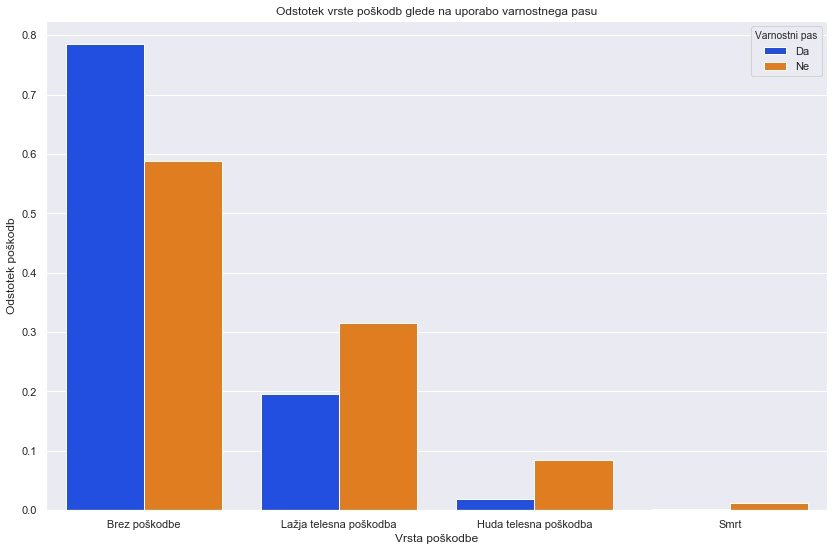

Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom: 0.21
Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom: 1.23
Odstotek nesreč z hudimi telesnimi poškodbami, kjer udeleženec ni bil pripet z varnostnim pasom: 8.51
Število mrtvih ljudi, ki niso bili pripeti z varnostnim pasom: 37


In [10]:
skupajDa = DA['brez'] + DA['lazja'] + DA['huda'] + DA['smrt']
skupajNe = NE['brez'] + NE['lazja'] + NE['huda'] + NE['smrt']
DA['brez'] = DA['brez'] / skupajDa
DA['lazja'] = DA['lazja'] / skupajDa
DA['huda'] = DA['huda'] / skupajDa
DA['smrt'] = DA['smrt'] / skupajDa
NE['brez'] = NE['brez'] / skupajNe
NE['lazja'] = NE['lazja'] / skupajNe
NE['huda'] = NE['huda'] / skupajNe
NE['smrt'] = NE['smrt'] / skupajNe

da = pd.DataFrame({'Vrsta poškodbe':['Brez poškodbe', 'Lažja telesna poškodba', 'Huda telesna poškodba', 'Smrt'],'Odstotek poškodb':[i for i in DA.values()]})
ne = pd.DataFrame({'Vrsta poškodbe':['Brez poškodbe', 'Lažja telesna poškodba', 'Huda telesna poškodba', 'Smrt'],'Odstotek poškodb':[i for i in NE.values()]})
da['Varnostni pas'] = 'Da'
ne['Varnostni pas'] = 'Ne'
res = pd.concat([da,ne])
sns.barplot(x = 'Vrsta poškodbe', y = 'Odstotek poškodb', data = res, hue = 'Varnostni pas', palette='bright').set_title('Odstotek vrste poškodb glede na uporabo varnostnega pasu')
sns.set(rc={'figure.figsize':(14,9)})
plt.show();

print("Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom:", round(DA['smrt']*100,2))
print("Odstotek nesreč s smrtnim izidom, kjer udeleženec ni bil pripet z varnostnim pasom:", round(NE['smrt']*100,2))
print("Odstotek nesreč z hudimi telesnimi poškodbami, kjer udeleženec ni bil pripet z varnostnim pasom:", round(NE['huda']*100,2))

print("Število mrtvih ljudi, ki niso bili pripeti z varnostnim pasom:", round((številoNePripetih * (NE['smrt']*100)) / 100))

## Bayes

In [11]:
tipPoskodba = list()
for row in data:
    tipPoskodba.append((row['VrstaUdelezenca'], row['PoskodbaUdelezenca']))
#P(poskodba|tipVozila="VOZNIK MOTORNEGA KOLESA")
hudaVsi = list()
lazjaVsi = list()
smrtVsi = list()
brezVsi = list()
vozilaVsi = list()
motorBrez = list()
motorLazjaPoskodba = list()
motorHudaPoskodba = list()
motorSmrt = list()
for row in tipPoskodba:
    if (row[0] == 'VOZNIK MOTORNEGA KOLESA' and row[1] == 'HUDA TELESNA POSKODBA'):
        motorHudaPoskodba.append(row[0] + " " + row[1])
    elif (row[0] == 'VOZNIK MOTORNEGA KOLESA' and row[1] == 'LAZJA TELESNA POSKODBA'):
        motorLazjaPoskodba.append(row[0] + " " + row[1])
    elif (row[0] == 'VOZNIK MOTORNEGA KOLESA' and row[1] == 'SMRT'):
        motorSmrt.append(row[0] + " " + row[1])
    elif (row[0] == 'VOZNIK MOTORNEGA KOLESA' and row[1] == 'BREZ POSKODBE'):
        motorBrez.append(row[0] + " " + row[1])
    if row[1] == 'HUDA TELESNA POSKODBA':
        hudaVsi.append(row[1])
    elif row[1] == 'LAZJA TELESNA POSKODBA':
        lazjaVsi.append(row[1])
    elif row[1] == 'SMRT':
        smrtVsi.append(row[1])
    elif (row[1] == 'BREZ POSKODBE'):
        brezVsi.append(row[1])
    if row[0] == 'VOZNIK MOTORNEGA KOLESA':
        vozilaVsi.append(row[0])
        
poskodbeVsi = list()
motorVsi = list()

poskodbeVsi.append(brezVsi)
poskodbeVsi.append(lazjaVsi)
poskodbeVsi.append(hudaVsi)
poskodbeVsi.append(smrtVsi)

motorVsi.append(motorBrez)
motorVsi.append(motorLazjaPoskodba)
motorVsi.append(motorHudaPoskodba)
motorVsi.append(motorSmrt)

for poskodba, motor in zip(poskodbeVsi, motorVsi):
    p_y = len(poskodba) / len(tipPoskodba)
    p_x = len(vozilaVsi) / len(tipPoskodba)
    p_xy = len(motor) / len(poskodba)
    p_yx = (p_xy * p_y) / p_x
    print("P(Y=%s | X=%s): %f" % (poskodba[0], vozilaVsi[0], p_yx))

P(Y=BREZ POSKODBE | X=VOZNIK MOTORNEGA KOLESA): 0.290415
P(Y=LAZJA TELESNA POSKODBA | X=VOZNIK MOTORNEGA KOLESA): 0.464950
P(Y=HUDA TELESNA POSKODBA | X=VOZNIK MOTORNEGA KOLESA): 0.211731
P(Y=SMRT | X=VOZNIK MOTORNEGA KOLESA): 0.028612


**VRSTA POSKODBE | OSEBNI AVTO IN NEPRIPET VARNOSTNI PAS**

In [17]:
p = list()
for row in data:
    p.append((row['VrstaUdelezenca'], row['PoskodbaUdelezenca'], row['UporabaVarnostnegaPasu']))
hVsi = list()
lVsi = list()
sVsi = list()
bVsi = list()
for row in p:
    if row[1] == 'HUDA TELESNA POSKODBA':
        hVsi.append(row[1])
    elif row[1] == 'LAZJA TELESNA POSKODBA':
        lVsi.append(row[1])
    elif row[1] == 'SMRT':
        sVsi.append(row[1])
    elif row[1] == 'BREZ POSKODBE':
        bVsi.append(row[1])
        
pVsi = list()

pVsi.append(bVsi)
pVsi.append(lVsi)
pVsi.append(hVsi)
pVsi.append(sVsi)

poskodbe = list()

for poskodba in pVsi:
    l = len(poskodba) / len(p)
    poskodbe.append(l)
    print("P(Y=%s): %f" % (poskodba[0], l))
    
print()
avtoVsi = list()
avtoBrez = list()
avtoLazjaPoskodba = list()
avtoHudaPoskodba = list()
avtoSmrt = list()
for row in tipPoskodba:
    if (row[0] == 'VOZNIK OSEBNEGA AVTOMOBILA' and row[1] == 'HUDA TELESNA POSKODBA'):
        avtoHudaPoskodba.append(row[0] + " " + row[1])
    elif (row[0] == 'VOZNIK OSEBNEGA AVTOMOBILA' and row[1] == 'LAZJA TELESNA POSKODBA'):
        avtoLazjaPoskodba.append(row[0] + " " + row[1])
    elif (row[0] == 'VOZNIK OSEBNEGA AVTOMOBILA' and row[1] == 'SMRT'):
        avtoSmrt.append(row[0] + " " + row[1])
    elif (row[0] == 'VOZNIK OSEBNEGA AVTOMOBILA' and row[1] == 'BREZ POSKODBE'):
        avtoBrez.append(row[0] + " " + row[1])
    if row[0] == 'VOZNIK OSEBNEGA AVTOMOBILA':
        avtoVsi.append(row[0])
        
aVsi = list()

aVsi.append(avtoBrez)
aVsi.append(avtoLazjaPoskodba)
aVsi.append(avtoHudaPoskodba)
aVsi.append(avtoSmrt)

avti = list()

for poskodba, avto in zip(pVsi, aVsi):
    p_y = len(poskodba) / len(p)
    p_x = len(avtoVsi) / len(p)
    p_xy = len(avto) / len(poskodba)
    a_p_yx = (p_xy * p_y) / p_x
    avti.append(a_p_yx)
    print("P(Y=%s | X=%s): %f" % (poskodba[0], avtoVsi[0], a_p_yx))
    
pasVsi = list()
pasBrez = list()
pasLazjaPoskodba = list()
pasHudaPoskodba = list()
pasSmrt = list()
for row in p:
    if (row[2] == 'NE' and row[1] == 'HUDA TELESNA POSKODBA'):
        pasHudaPoskodba.append(row[0] + " " + row[1])
    elif (row[2] == 'NE' and row[1] == 'LAZJA TELESNA POSKODBA'):
        pasLazjaPoskodba.append(row[0] + " " + row[1])
    elif (row[2] == 'NE' and row[1] == 'SMRT'):
        pasSmrt.append(row[0] + " " + row[1])
    elif (row[2] == 'NE' and row[1] == 'BREZ POSKODBE'):
        pasBrez.append(row[0] + " " + row[1])
    if row[2] == 'NE':
        pasVsi.append(row[2])

print()
vpVsi = list()

vpVsi.append(pasBrez)
vpVsi.append(pasLazjaPoskodba)
vpVsi.append(pasHudaPoskodba)
vpVsi.append(pasSmrt)

pasNE = list()

for poskodba, pas in zip(pVsi, vpVsi):
    p_y = len(poskodba) / len(p)
    p_x = len(pasVsi) / len(p)
    p_xy = len(pas) / len(poskodba)
    vp_p_yx = (p_xy * p_y) / p_x
    pasNE.append(vp_p_yx)
    print("P(Y=%s | X=%s): %f" % (poskodba[0], pasVsi[0], vp_p_yx))
    
print()
imena = ["BREZ POSKODBE", "LAZJE TELESNE POSKODBE", "HUDE TELESNE POSKODBE", "SMRT"]
for ime, po, a, vp in zip(imena, poskodbe, avti, pasNE):
    print(("P(Y=%s | X1=OSEBNI AVTOMOBIL, X2=NEPRIPET VARNOSTNI PAS): %f" % (ime, (po*a*vp))))

P(Y=BREZ POSKODBE): 0.760614
P(Y=LAZJA TELESNA POSKODBA): 0.199321
P(Y=HUDA TELESNA POSKODBA): 0.024015
P(Y=SMRT): 0.003009

P(Y=BREZ POSKODBE | X=VOZNIK OSEBNEGA AVTOMOBILA): 0.849731
P(Y=LAZJA TELESNA POSKODBA | X=VOZNIK OSEBNEGA AVTOMOBILA): 0.132571
P(Y=HUDA TELESNA POSKODBA | X=VOZNIK OSEBNEGA AVTOMOBILA): 0.006804
P(Y=SMRT | X=VOZNIK OSEBNEGA AVTOMOBILA): 0.001211

P(Y=BREZ POSKODBE | X=NE): 0.574518
P(Y=LAZJA TELESNA POSKODBA | X=NE): 0.307385
P(Y=HUDA TELESNA POSKODBA | X=NE): 0.083167
P(Y=SMRT | X=NE): 0.011976

P(Y=BREZ POSKODBE | X1=OSEBNI AVTOMOBIL, X2=NEPRIPET VARNOSTNI PAS): 0.371320
P(Y=LAZJE TELESNE POSKODBE | X1=OSEBNI AVTOMOBIL, X2=NEPRIPET VARNOSTNI PAS): 0.008122
P(Y=HUDE TELESNE POSKODBE | X1=OSEBNI AVTOMOBIL, X2=NEPRIPET VARNOSTNI PAS): 0.000014
P(Y=SMRT | X1=OSEBNI AVTOMOBIL, X2=NEPRIPET VARNOSTNI PAS): 0.000000


In [20]:
from csv import DictReader
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

data = list(DictReader(open('podatki/pn2019.csv', 'rt', encoding='utf-8'), delimiter=";"))

kraji = dict()
ureNesrec = dict()
udelezenciNesrec = dict()

In [21]:
def parseVehicle(crashParticipant):
    slovarTipovVozil = {"voznik osebnega avtomobila": "osebni avtomobil", "voznik mopeda": "enosledno vozilo",
                        "voznik avtobusa": "avtobus", "voznik tovornega vozila": "tovorno vozilo",
                        "voznik traktorja": "traktor", "kolesar": "kolesar", "potnik": "potnik",
                        "voznik delovnega stroja": "delovni stroj", "voznik specialnega vozila": "specialno vozilo",
                        "voznik motornega kolesa": "enosledno vozilo", "ostalo": "ostalo", "pesec": "pesec"}
    
    for kljuc, tipVozila in slovarTipovVozil.items():
        if kljuc.upper() in crashParticipant:    
            return tipVozila
    
    return "ostalo"

def parseDamages(crashParticipant):
    slovarPoskodb = {"lazjo telesno poskodbo": "lažja poškodba", "materialno skodo": "materialna škoda",
                     "s smrtnim izidom": "smrtni izid", "hudo telesno poskodbo": "huda telesna poškodba"}
    
    for kljuc, poskodba in slovarPoskodb.items():
        if kljuc.upper() in crashParticipant:
            return poskodba
    
    return ""

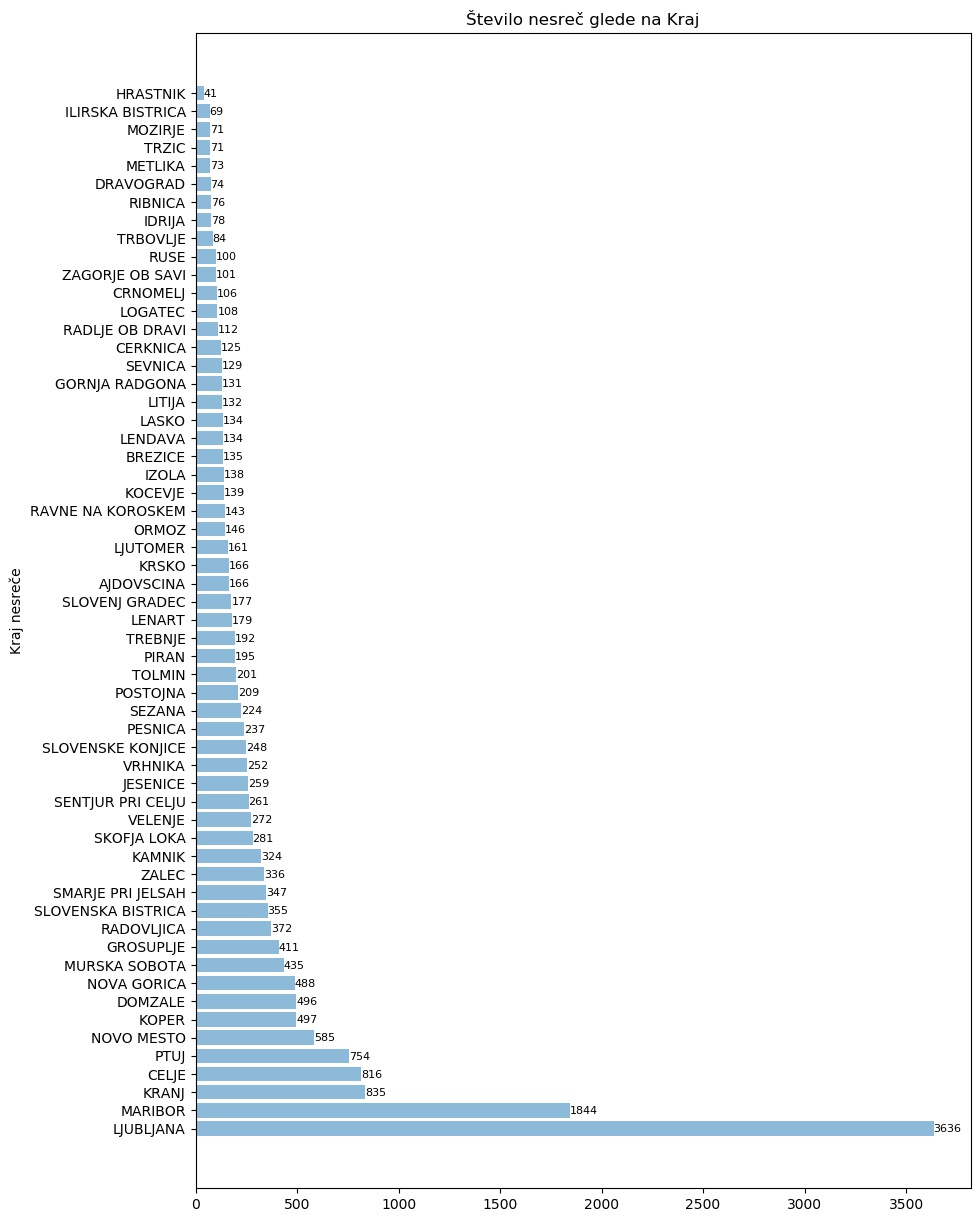

In [23]:
for row in data:
    kraj = row["UpravnaEnotaStoritve"]
    nesrecaId = int(row["ZaporednaStevilkaPN"])
    uraNesrece = int(row["UraPN"])
    tipVozila = parseVehicle(row["VrstaUdelezenca"])
    poskodba = parseDamages(row["KlasifikacijaNesrece"])
    
    if nesrecaId not in udelezenciNesrec:
        udelezenciNesrec[nesrecaId] = [[tipVozila, poskodba]]
    else:
        udelezenciNesrec[nesrecaId].append([tipVozila, poskodba])
    
    if kraj not in kraji:
        kraji[kraj] = [nesrecaId]
    elif nesrecaId not in kraji[kraj]:
        kraji[kraj].append(nesrecaId)
        
    if uraNesrece not in ureNesrec:
        ureNesrec[uraNesrece] = [nesrecaId]
    elif nesrecaId not in ureNesrec[uraNesrece]:
        ureNesrec[uraNesrece].append(nesrecaId)
        
for kraj, ids in kraji.items():
    kraji[kraj] = len(ids)

for ura, ids in ureNesrec.items():
    ureNesrec[ura] = len(ids)
    
sorted_kraji = {k: v for k, v in sorted(kraji.items(), reverse=True, key=lambda item: item[1])}

kraji_nesrec = []
stNesrec = []

for kraj, value in sorted_kraji.items():
    if kraj not in kraji_nesrec:
            kraji_nesrec.append(kraj)
    
    stNesrec.append(value)

y_pos = np.arange(len(kraji_nesrec))

plt.figure(figsize=(10,15))
plt.barh(y_pos, stNesrec, align='center', alpha=0.5)
plt.yticks(y_pos, kraji_nesrec)
plt.ylabel('Kraj nesreče')
plt.title('Število nesreč glede na Kraj')
for i, v in enumerate(stNesrec):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

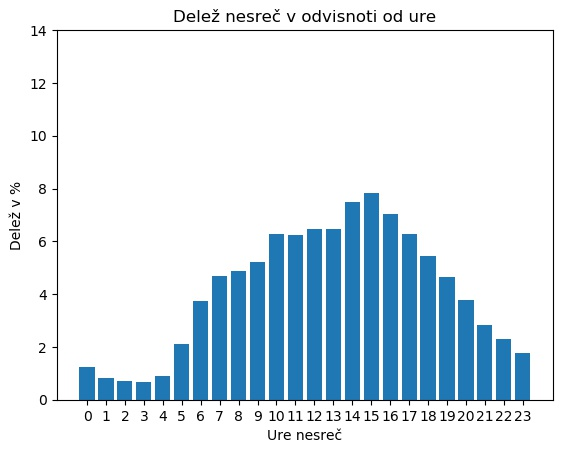

In [24]:
vse_nesrece = 0

for _, stevilo_nesrece in ureNesrec.items():
    vse_nesrece += stevilo_nesrece
    

nesrece = [(value / vse_nesrece) * 100.0 for _, value in ureNesrec.items()]
ure = [ura for ura, _ in ureNesrec.items()]

#plt.figure(figsize=(8,6))
plt.bar(ure, nesrece)
plt.title('Delež nesreč v odvisnoti od ure')
plt.ylabel('Delež v %')
plt.xlabel('Ure nesreč')
plt.xticks(np.arange(24))
plt.ylim(0, 14)
plt.show()

In [25]:
pearsonovaKorelacija = np.mean(((ure - np.mean(ure))*(nesrece-np.mean(nesrece)))/(np.std(ure)*np.std(nesrece)))
print("Pearsonova korelacija:", pearsonovaKorelacija)

Pearsonova korelacija: 0.4097438054405891


{'osebni avtomobil': 47914, 'tovorno vozilo': 5746, 'ostalo': 3608, 'kolesar': 2730, 'enosledno vozilo': 2174, 'avtobus': 680, 'traktor': 298, 'specialno vozilo': 76, 'delovni stroj': 60}


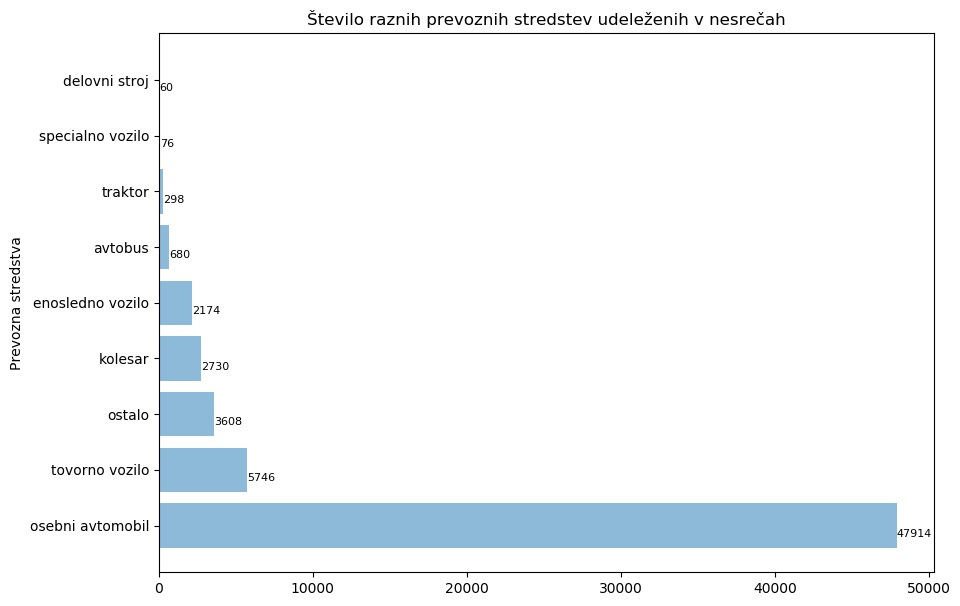

In [26]:
tipiPrevoznihStredstev = dict()
smrtGledeNaVozilo = dict()

seznamNeVozil = ["pesec", "potnik"]

for _, udelezenci in udelezenciNesrec.items():
    for vozilo, poskodbe in udelezenci:
        if vozilo not in seznamNeVozil:
            if vozilo not in tipiPrevoznihStredstev:
                tipiPrevoznihStredstev[vozilo] = 1
            else:
                tipiPrevoznihStredstev[vozilo] += 1
                
            if poskodbe == "smrtni izid":
                if vozilo not in smrtGledeNaVozilo:
                    smrtGledeNaVozilo[vozilo] = 1
                else:
                    smrtGledeNaVozilo[vozilo] += 1
                    
#Število posameznik prevoznih stredstev v nesrečah
            
tipiPrevoznihStredstev = {k: v for k, v in sorted(tipiPrevoznihStredstev.items(), reverse=True, key=lambda item: item[1])}

print(tipiPrevoznihStredstev)

stredstvo = []
stVkljucenih = []

for vozilo, value in tipiPrevoznihStredstev.items():
    if vozilo not in stredstvo:
            stredstvo.append(vozilo)
    
    stVkljucenih.append(value)

y_pos = np.arange(len(stredstvo))
plt.figure(figsize=(10,7))
plt.barh(y_pos, stVkljucenih, align='center', alpha=0.5)
plt.yticks(y_pos, stredstvo)
plt.ylabel('Prevozna stredstva')
plt.title('Število raznih prevoznih stredstev udeleženih v nesrečah')
for i, v in enumerate(stVkljucenih):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

{'osebni avtomobil': 176, 'enosledno vozilo': 56, 'tovorno vozilo': 38, 'kolesar': 18, 'avtobus': 8, 'traktor': 4, 'ostalo': 2}


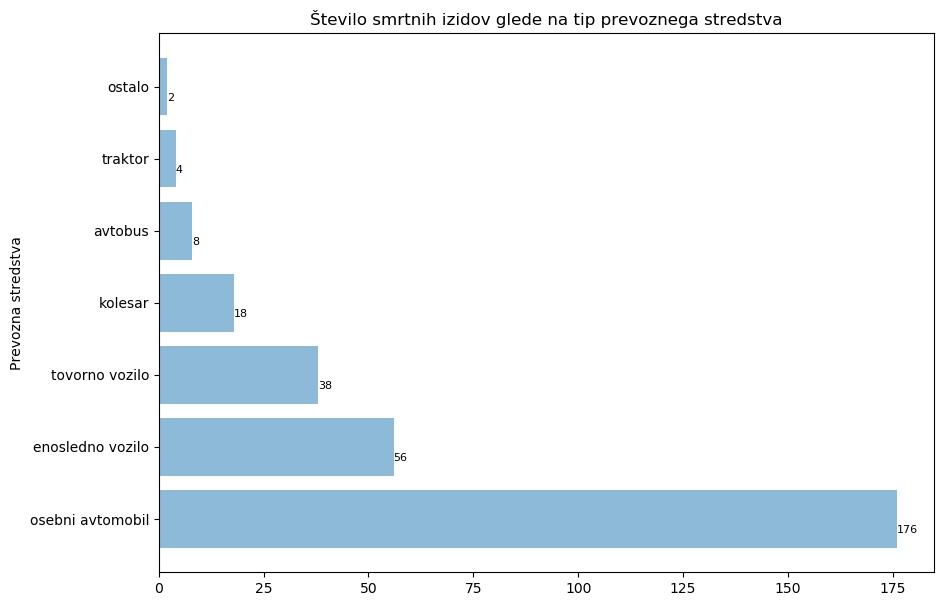

In [27]:
#Število smrtnih izidov glede na tip prevoznega stredstva

smrtGledeNaVozilo = {k: v for k, v in sorted(smrtGledeNaVozilo.items(), reverse=True, key=lambda item: item[1])}

print(smrtGledeNaVozilo)

stredstvo = []
stVkljucenih = []

for vozilo, value in smrtGledeNaVozilo.items():
    if vozilo not in stredstvo:
            stredstvo.append(vozilo)
    
    stVkljucenih.append(value)

y_pos = np.arange(len(stredstvo))
plt.figure(figsize=(10,7))
plt.barh(y_pos, stVkljucenih, align='center', alpha=0.5)
plt.yticks(y_pos, stredstvo)
plt.ylabel('Prevozna stredstva')
plt.title('Število smrtnih izidov glede na tip prevoznega stredstva')
for i, v in enumerate(stVkljucenih):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)
plt.show()

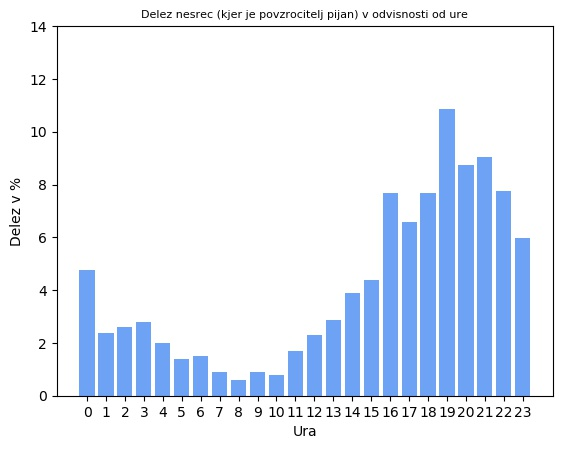

In [28]:
vsi = 0
ure_nesrec = dict()
for row in data:
    ura = int(row["UraPN"])
    alkotest = float("0" + row["VrednostAlkotesta"].replace(",", "."))
    if row["Povzrocitelj"] == "POVZROCITELJ":
        if alkotest > 0.5:
            if ura not in ure_nesrec.keys():
                ure_nesrec[ura] = 0
            ure_nesrec[ura] += 1
            vsi += 1;
        

s = sorted(ure_nesrec.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ure_nesrec.get(i) / vsi) * 100.0

#plt.figure(dpi = 120)
plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (kjer je povzrocitelj pijan) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 14)
plt.ylabel("Delez v %");

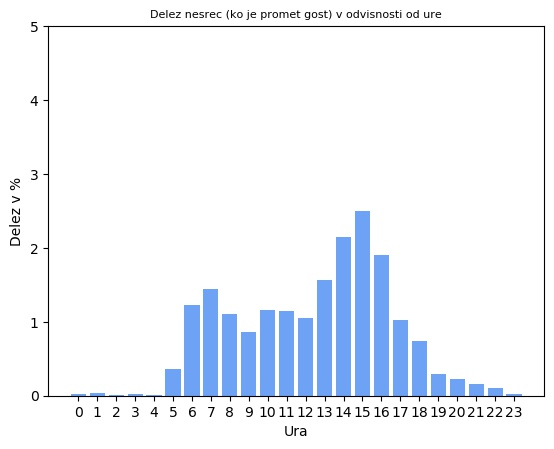

In [29]:
ureNesrecGost = dict()
ureNesrecRedek = dict()
ureNesrecNormalen = dict()
vsi = 0

for row in data:
    nesrecaId = int(row["ZaporednaStevilkaPN"])
    uraNesrece = int(row["UraPN"])
    stanjePrometa = row["StanjePrometa"]
    
    if stanjePrometa == "NORMALEN":
        if uraNesrece not in ureNesrecNormalen:
            ureNesrecNormalen[uraNesrece] = 1;
            vsi += 1
        elif nesrecaId not in ureNesrecNormalen:
            ureNesrecNormalen[uraNesrece] += 1;
            vsi += 1
    elif stanjePrometa == "GOST":
        if uraNesrece not in ureNesrecGost:
            ureNesrecGost[uraNesrece] = 1;
            vsi += 1
        elif nesrecaId not in ureNesrecGost:
            ureNesrecGost[uraNesrece] += 1;
            vsi += 1
    elif stanjePrometa == "REDEK":
        if uraNesrece not in ureNesrecRedek:
            ureNesrecRedek[uraNesrece] = 1;
            vsi += 1
        elif nesrecaId not in ureNesrecRedek:
            ureNesrecRedek[uraNesrece] += 1;
            vsi += 1
            
s = sorted(ureNesrecGost.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ureNesrecGost.get(i) / vsi) * 100.0

plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (ko je promet gost) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 5)
plt.ylabel("Delez v %"); 

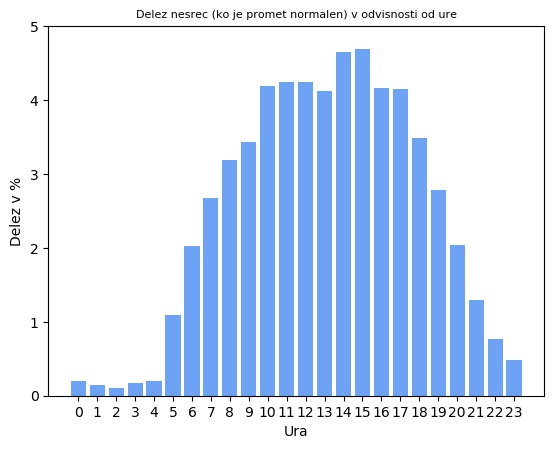

In [30]:
s = sorted(ureNesrecNormalen.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ureNesrecNormalen.get(i) / vsi) * 100.0

plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (ko je promet normalen) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 5)
plt.ylabel("Delez v %"); 

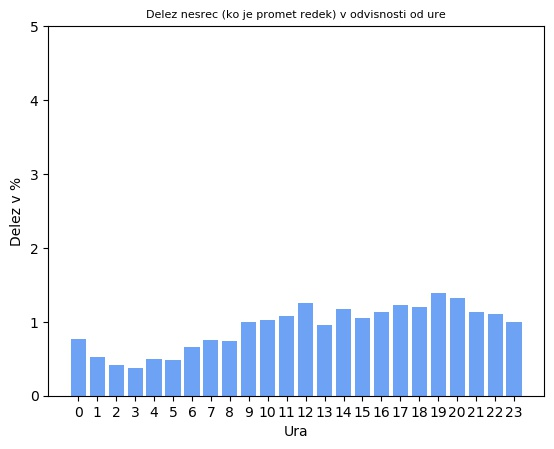

In [31]:
s = sorted(ureNesrecRedek.keys())
ure_nesrec_sorted = dict()
for i in s:
    ure_nesrec_sorted[i] = (ureNesrecRedek.get(i) / vsi) * 100.0

plt.bar(ure_nesrec_sorted.keys(), ure_nesrec_sorted.values(), color="#6ea2f5");
plt.title("Delez nesrec (ko je promet redek) v odvisnosti od ure", fontsize=8)
plt.xlabel("Ura");
plt.xticks(s)
plt.ylim(0, 5)
plt.ylabel("Delez v %"); 

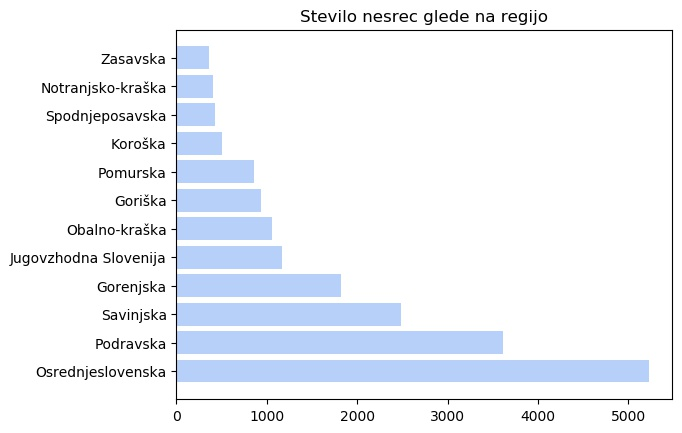

In [32]:
slovenske_regije = {
    'NOVA GORICA': 'Goriška',
    'KOPER': 'Obalno-kraška',
    'LENDAVA': 'Pomurska',
    'POSTOJNA': 'Notranjsko-kraška',
    'RADLJE OB DRAVI': 'Koroška',
    'MARIBOR': 'Podravska',
    'SLOVENJ GRADEC': 'Koroška',
    'KAMNIK': 'Osrednjeslovenska',
    'JESENICE': 'Gorenjska',
    'NOVO MESTO': 'Jugovzhodna Slovenija',
    'CELJE': 'Savinjska',
    'GORNJA RADGONA': 'Pomurska',
    'MURSKA SOBOTA': 'Pomurska',
    'CERKNICA': 'Notranjsko-kraška',
    'TOLMIN': 'Goriška',
    'ZAGORJE OB SAVI': 'Zasavska',
    'DRAVOGRAD': 'Koroška',
    'DOMZALE': 'Osrednjeslovenska',
    'CRNOMELJ': 'Jugovzhodna Slovenija',
    'SKOFJA LOKA': 'Gorenjska',
    'SEZANA': 'Obalno-kraška',
    'KOCEVJE': 'Jugovzhodna Slovenija',
    'PIRAN': 'Obalno-kraška',
    'LENART': 'Podravska',
    'PTUJ': 'Podravska',
    'ORMOZ': 'Podravska',
    'RADOVLJICA': 'Gorenjska',
    'VRHNIKA': 'Osrednjeslovenska',
    'ZALEC': 'Savinjska',
    'VELENJE': 'Savinjska',
    'SMARJE PRI JELSAH': 'Savinjska',
    'IZOLA': 'Obalno-kraška',
    'SLOVENSKE KONJICE': 'Savinjska',
    'GROSUPLJE': 'Osrednjeslovenska',
    'KRANJ': 'Gorenjska',
    'AJDOVSCINA': 'Goriška',
    'SLOVENSKA BISTRICA': 'Podravska',
    'LOGATEC': 'Osrednjeslovenska',
    'SEVNICA': 'Spodnjeposavska',
    'TRZIC': 'Gorenjska',
    'TREBNJE': 'Jugovzhodna Slovenija',
    'PESNICA': 'Podravska',
    'SENTJUR PRI CELJU': 'Savinjska',
    'BREZICE': 'Spodnjeposavska',
    'ILIRSKA BISTRICA': 'Notranjsko-kraška',
    'LJUTOMER': 'Pomurska',
    'RAVNE NA KOROSKEM': 'Koroška',
    'MOZIRJE': 'Savinjska',
    'KRSKO': 'Spodnjeposavska',
    'RUSE': 'Podravska',
    'LITIJA': 'Zasavska',
    'RIBNICA': 'Jugovzhodna Slovenija',
    'LASKO': 'Savinjska',
    'IDRIJA': 'Goriška',
    'HRASTNIK': 'Zasavska',
    'TRBOVLJE': 'Zasavska',
    'METLIKA': 'Jugovzhodna Slovenija',
    'LJUBLJANA': 'Osrednjeslovenska'
}

def convert(kraj):
    return slovenske_regije[kraj]

regije = dict()

for kraj, value in kraji.items():
    if convert(kraj) not in regije:
        regije[convert(kraj)] = value
    else:
        regije[convert(kraj)] += value

        
regije_sorted = {k: v for k, v in sorted(regije.items(), reverse=True, key=lambda item: item[1])}
y_pos = np.arange(len(regije_sorted.keys()))

plt.barh(y_pos, regije_sorted.values(), align='center', alpha=0.5, color="#6ea2f5")
plt.yticks(y_pos, regije_sorted.keys())
plt.title("Stevilo nesrec glede na regijo")
plt.show()

In [33]:
mesci = ["Januar", "Februar", "Marec", "April", "Maj", "Junij", "Julij", "Avgust", "September", "Oktober", "November", "December"]

nesrece_po_mescih = dict()

for row in data:
    datum = row["DatumPN"].split(".")[1]
    regija = convert(row["UpravnaEnotaStoritve"])
    nesrecaId = int(row["ZaporednaStevilkaPN"])
    
    mesec = mesci[int(datum) - 1]
    
    if mesec not in nesrece_po_mescih:
        nesrece_po_mescih[mesec] = [regija]
    elif nesrecaId not in nesrece_po_mescih[mesec]:
        nesrece_po_mescih[mesec].append(regija)


for mesec in nesrece_po_mescih.keys():
    nesrece_mesec = dict()
    
    for regija in nesrece_po_mescih[mesec]:
        if regija not in nesrece_mesec:
            nesrece_mesec[regija] = 1
        else:
            nesrece_mesec[regija] += 1
            
    sorted_nesrece_mesec = {k: v for k, v in sorted(nesrece_mesec.items(), reverse=True, key=lambda item: item[1])}
    y_pos = np.arange(len(sorted_nesrece_mesec.keys()))

    df = pd.DataFrame(columns=["Regija", "St. nesrec"])
    df["Regija"] = sorted_nesrece_mesec.keys()
    df["St. nesrec"] = sorted_nesrece_mesec.values()
    
    print("\n" + mesec)
    display(df)
    
    """
    plt.barh(y_pos, sorted_nesrece_mesec.values(), align='center', alpha=0.5)
    plt.yticks(y_pos, sorted_nesrece_mesec.keys())
    plt.title(mesec)
    plt.show()
    """



Januar


,Regija,St. nesrec
0,Osrednjeslovenska,727
1,Podravska,461
2,Savinjska,338
3,Gorenjska,234
4,Jugovzhodna Slovenija,139
5,Pomurska,117
6,Obalno-kraška,90
7,Goriška,89
8,Koroška,87
9,Spodnjeposavska,62



Februar


,Regija,St. nesrec
0,Osrednjeslovenska,641
1,Podravska,478
2,Savinjska,281
3,Gorenjska,195
4,Jugovzhodna Slovenija,140
5,Obalno-kraška,132
6,Goriška,115
7,Pomurska,81
8,Koroška,51
9,Zasavska,43



Marec


,Regija,St. nesrec
0,Osrednjeslovenska,774
1,Podravska,507
2,Savinjska,336
3,Gorenjska,213
4,Jugovzhodna Slovenija,176
5,Goriška,121
6,Pomurska,115
7,Obalno-kraška,111
8,Koroška,69
9,Spodnjeposavska,66



April


,Regija,St. nesrec
0,Osrednjeslovenska,786
1,Podravska,512
2,Savinjska,408
3,Gorenjska,225
4,Jugovzhodna Slovenija,153
5,Obalno-kraška,125
6,Goriška,117
7,Pomurska,101
8,Spodnjeposavska,72
9,Koroška,66



Julij


,Regija,St. nesrec
0,Osrednjeslovenska,775
1,Podravska,557
2,Savinjska,350
3,Gorenjska,347
4,Jugovzhodna Slovenija,193
5,Obalno-kraška,188
6,Goriška,157
7,Pomurska,111
8,Spodnjeposavska,77
9,Notranjsko-kraška,69



Maj


,Regija,St. nesrec
0,Osrednjeslovenska,811
1,Podravska,542
2,Savinjska,401
3,Gorenjska,258
4,Jugovzhodna Slovenija,169
5,Obalno-kraška,148
6,Koroška,114
7,Goriška,106
8,Pomurska,85
9,Spodnjeposavska,71



Junij


,Regija,St. nesrec
0,Osrednjeslovenska,923
1,Podravska,592
2,Savinjska,444
3,Gorenjska,309
4,Obalno-kraška,223
5,Goriška,202
6,Jugovzhodna Slovenija,189
7,Pomurska,129
8,Koroška,75
9,Spodnjeposavska,68



Avgust


,Regija,St. nesrec
0,Osrednjeslovenska,719
1,Podravska,472
2,Savinjska,372
3,Gorenjska,358
4,Obalno-kraška,231
5,Jugovzhodna Slovenija,149
6,Goriška,122
7,Pomurska,101
8,Koroška,93
9,Notranjsko-kraška,87



September


,Regija,St. nesrec
0,Osrednjeslovenska,933
1,Podravska,602
2,Savinjska,403
3,Gorenjska,270
4,Obalno-kraška,183
5,Jugovzhodna Slovenija,163
6,Goriška,154
7,Pomurska,143
8,Spodnjeposavska,87
9,Notranjsko-kraška,79



Oktober


,Regija,St. nesrec
0,Osrednjeslovenska,989
1,Podravska,663
2,Savinjska,467
3,Gorenjska,288
4,Jugovzhodna Slovenija,192
5,Goriška,170
6,Obalno-kraška,163
7,Pomurska,155
8,Koroška,101
9,Spodnjeposavska,76



November


,Regija,St. nesrec
0,Osrednjeslovenska,858
1,Podravska,567
2,Savinjska,388
3,Gorenjska,191
4,Jugovzhodna Slovenija,185
5,Obalno-kraška,153
6,Goriška,137
7,Pomurska,117
8,Zasavska,69
9,Koroška,68



December


,Regija,St. nesrec
0,Osrednjeslovenska,791
1,Podravska,610
2,Savinjska,341
3,Gorenjska,225
4,Jugovzhodna Slovenija,184
5,Obalno-kraška,131
6,Pomurska,124
7,Goriška,111
8,Koroška,74
9,Notranjsko-kraška,70


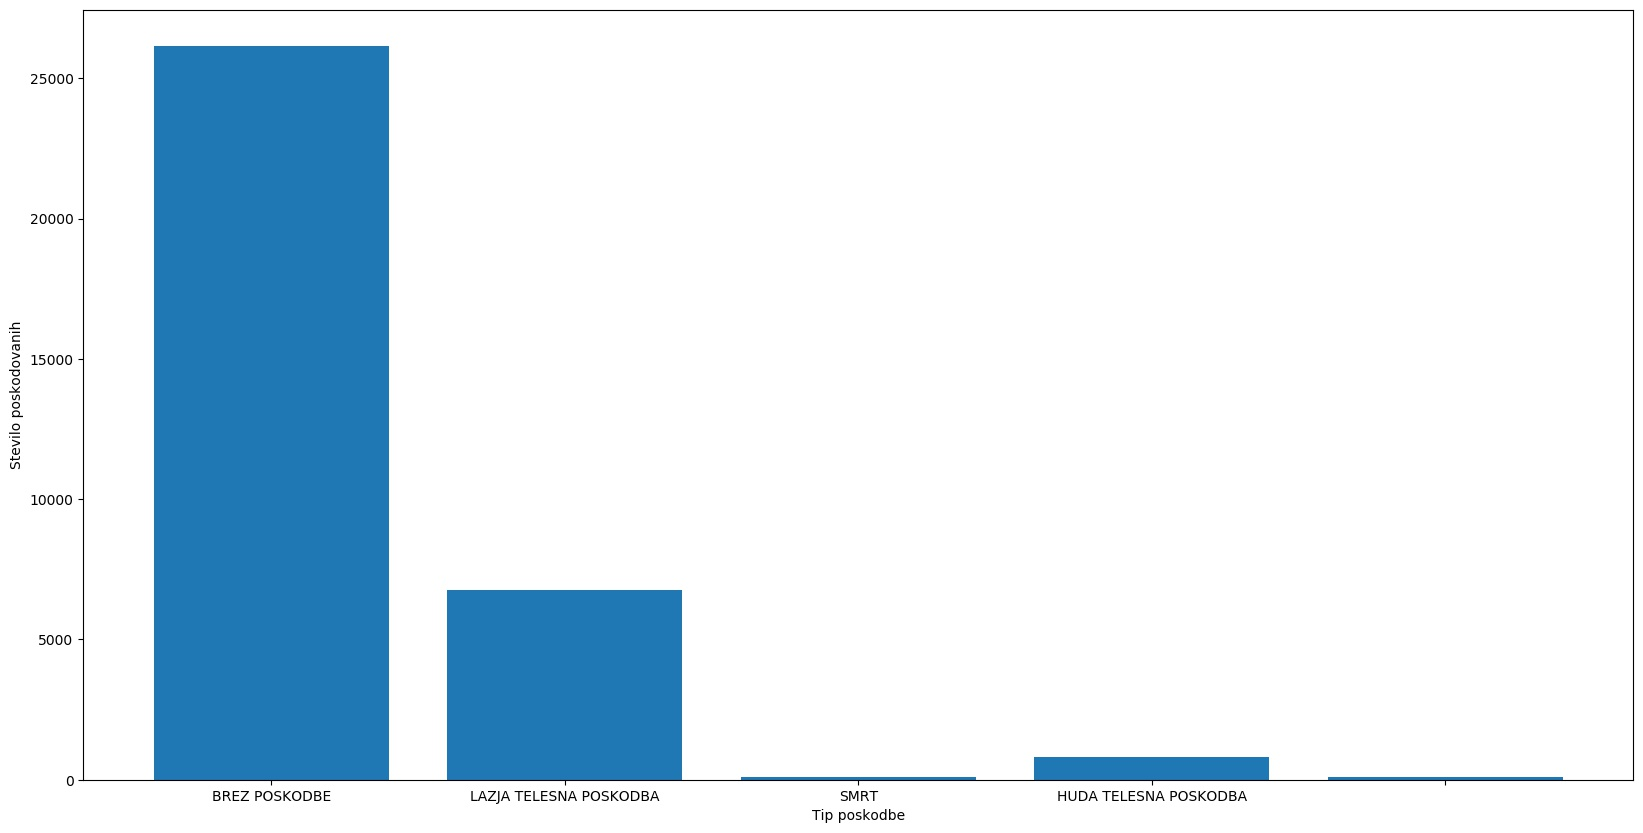

In [35]:
slovar = {}
seznam_ID = []
for row in data:
    poskodba = row["PoskodbaUdelezenca"]
    if(poskodba == "BREZ POSKODBE-UZ"):  #uz je samo uradni zaznamek
        poskodba = "BREZ POSKODBE"
    if(poskodba not in slovar.keys()):
        slovar[poskodba] = 1
    else:
        slovar[poskodba] += 1

poskodbe = slovar.keys()
stevilo = slovar.values()
plt.figure(figsize=(20, 10))
plt.bar(poskodbe, stevilo)
plt.xlabel("Tip poskodbe")
plt.ylabel("Stevilo poskodovanih");   

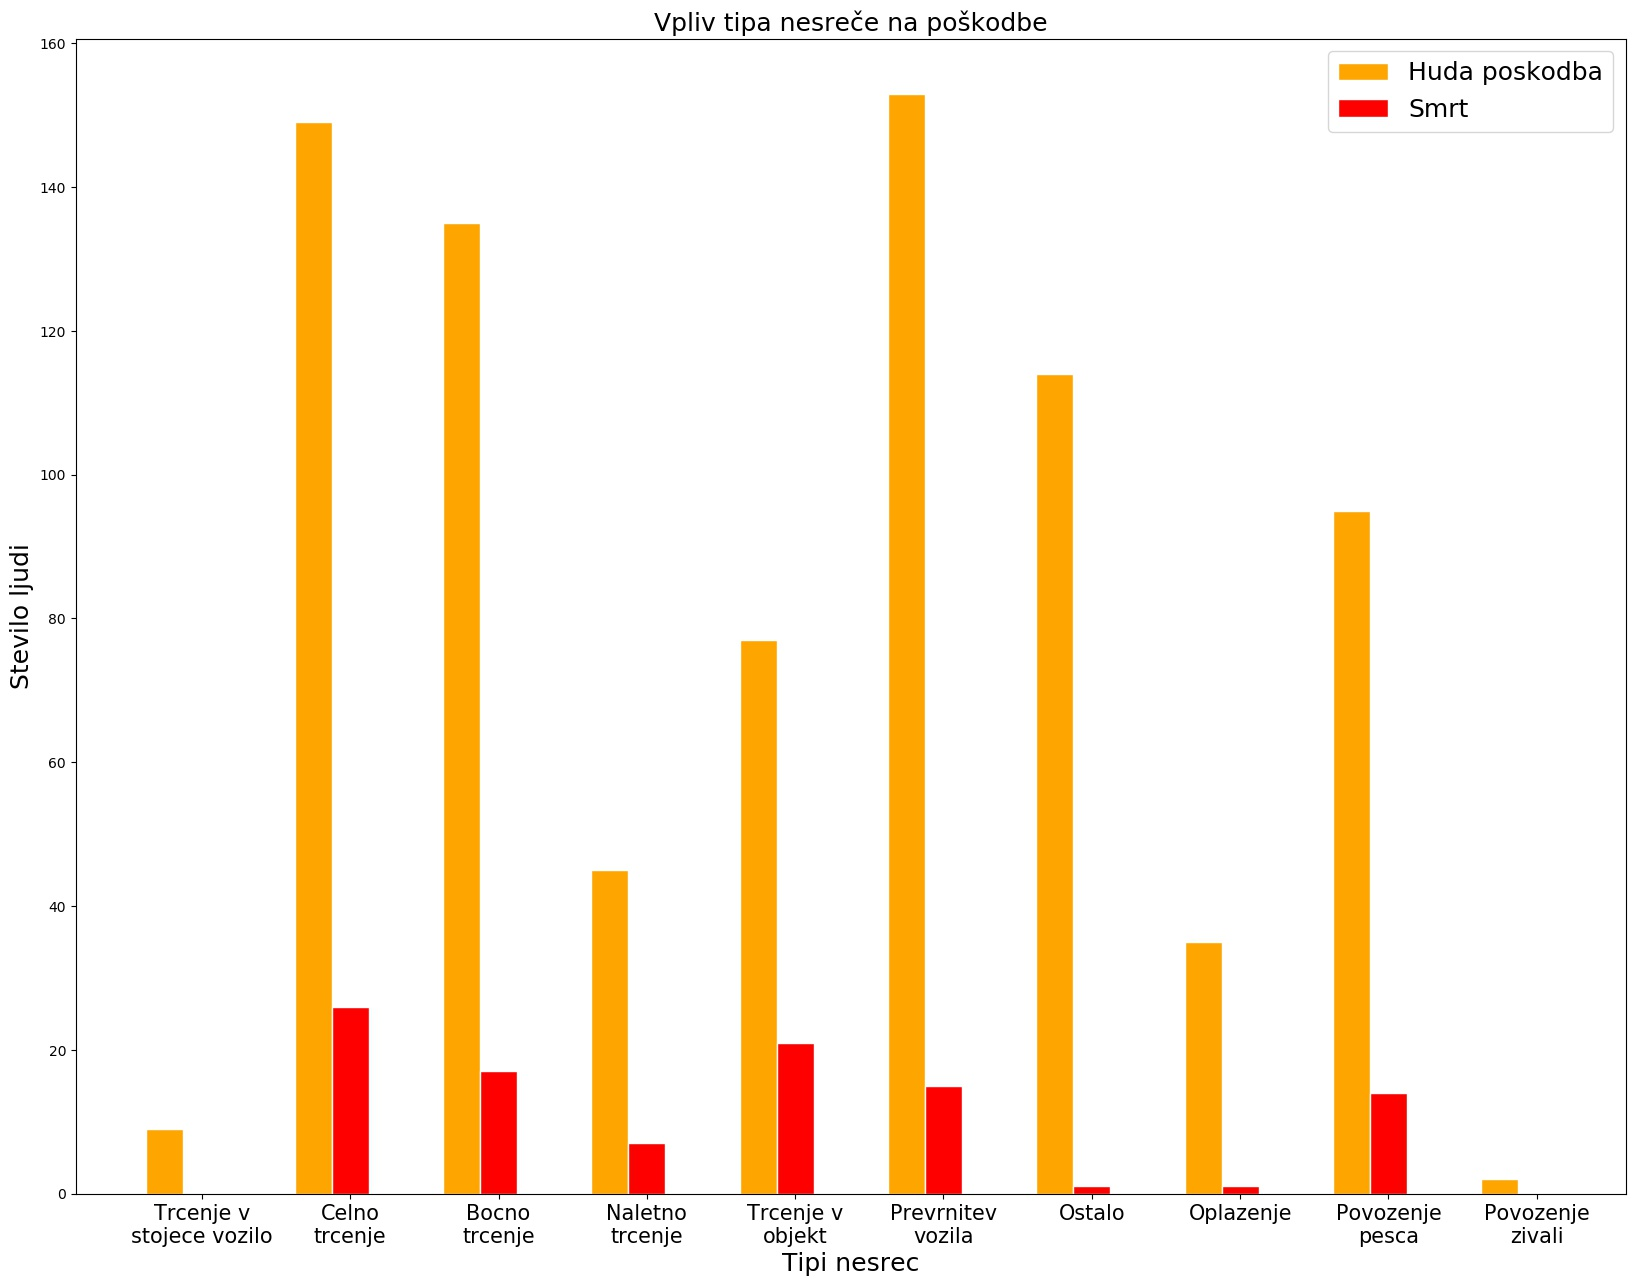

Tabela podatkov (Če atributa ni pomeni, da se poškodba v tem tipu nesreče ni zgodila, '' pa je neveljaven primer):

Trčenje v stoječe vozilo: {'LAZJA TELESNA POSKODBA': 355, 'HUDA TELESNA POSKODBA': 9, 'BREZ POSKODBE': 5305, '': 16}
Čelno trčenje: {'SMRT': 26, 'LAZJA TELESNA POSKODBA': 1070, 'HUDA TELESNA POSKODBA': 149, 'BREZ POSKODBE': 1853, '': 6}
Bočno trčenje: {'SMRT': 17, 'LAZJA TELESNA POSKODBA': 1497, 'HUDA TELESNA POSKODBA': 135, 'BREZ POSKODBE': 5338, '': 12}
Naletno trčenje: {'SMRT': 7, 'LAZJA TELESNA POSKODBA': 1153, 'HUDA TELESNA POSKODBA': 45, 'BREZ POSKODBE': 3863, '': 16}
Trčenje v objekt: {'SMRT': 21, 'LAZJA TELESNA POSKODBA': 506, 'HUDA TELESNA POSKODBA': 77, 'BREZ POSKODBE': 2155, '': 4}
Prevrnitev vozila: {'SMRT': 15, 'LAZJA TELESNA POSKODBA': 719, 'HUDA TELESNA POSKODBA': 153, 'BREZ POSKODBE': 442, '': 2}
Ostalo: {'SMRT': 1, 'LAZJA TELESNA POSKODBA': 677, 'HUDA TELESNA POSKODBA': 114, 'BREZ POSKODBE': 2078, '': 10}
Oplazenje: {'SMRT': 1, 'LAZJA TELESNA POSKODBA': 2

In [82]:
parking = {}
celno = {}
bocno = {}
nalet = {}
objekt = {}
prevrnjeno = {}
ostalo = {}
oplazenje = {}
pesec = {}
zivali = {}
for row in data:
    tip = row["TipNesrece"]
    poskodba = row["PoskodbaUdelezenca"]
    
    if(poskodba == "BREZ POSKODBE-UZ"):  #uz je samo uradni zaznamek
        poskodba = "BREZ POSKODBE"
        
    if(tip == 'TRCENJE V STOJECE / PARKIRANO VOZILO'):
        if(poskodba not in parking.keys()):
            parking[poskodba] = 1
        else:
            parking[poskodba] += 1
            
    if(tip == 'CELNO TRCENJE'):
        if(poskodba not in celno.keys()):
            celno[poskodba] = 1
        else:
            celno[poskodba] += 1
            
    if(tip == 'BOCNO TRCENJE'):
        if(poskodba not in bocno.keys()):
            bocno[poskodba] = 1
        else:
            bocno[poskodba] += 1
            
    if(tip == 'NALETNO TRCENJE'):
        if(poskodba not in nalet.keys()):
            nalet[poskodba] = 1
        else:
            nalet[poskodba] += 1
            
    if(tip == 'TRCENJE V OBJEKT'):
        if(poskodba not in objekt.keys()):
            objekt[poskodba] = 1
        else:
            objekt[poskodba] += 1
            
    if(tip == 'PREVRNITEV VOZILA'):
        if(poskodba not in prevrnjeno.keys()):
            prevrnjeno[poskodba] = 1
        else:
            prevrnjeno[poskodba] += 1
            
    if(tip == 'OSTALO'):
        if(poskodba not in ostalo.keys()):
            ostalo[poskodba] = 1
        else:
            ostalo[poskodba] += 1
            
    if(tip == 'OPLAZENJE'):
        if(poskodba not in oplazenje.keys()):
            oplazenje[poskodba] = 1
        else:
            oplazenje[poskodba] += 1
            
    if(tip == 'POVOZENJE PESCA'):
        if(poskodba not in pesec.keys()):
            pesec[poskodba] = 1
        else:
            pesec[poskodba] += 1
            
    if(tip == 'POVOZENJE ZIVALI'):
        if(poskodba not in zivali.keys()):
            zivali[poskodba] = 1
        else:
            zivali[poskodba] += 1

parking = {k: v for k, v in sorted(parking.items(), reverse=True, key=lambda item: item[0])}
celno = {k: v for k, v in sorted(celno.items(), reverse=True, key=lambda item: item[0])}
bocno = {k: v for k, v in sorted(bocno.items(), reverse=True, key=lambda item: item[0])}
nalet = {k: v for k, v in sorted(nalet.items(), reverse=True, key=lambda item: item[0])}
objekt = {k: v for k, v in sorted(objekt.items(), reverse=True, key=lambda item: item[0])}
prevrnjeno = {k: v for k, v in sorted(prevrnjeno.items(), reverse=True, key=lambda item: item[0])}
ostalo = {k: v for k, v in sorted(ostalo.items(), reverse=True, key=lambda item: item[0])}
oplazenje = {k: v for k, v in sorted(oplazenje.items(), reverse=True, key=lambda item: item[0])}
pesec = {k: v for k, v in sorted(pesec.items(), reverse=True, key=lambda item: item[0])}
zivali = {k: v for k, v in sorted(zivali.items(), reverse=True, key=lambda item: item[0])}

vsi_slovarji = [parking, celno, bocno, nalet, objekt, prevrnjeno, ostalo, oplazenje, pesec, zivali]
brez = []
lazja = []
smrt = []
huda = []

for i in range(0, 10):
    if('BREZ POSKODBE' not in vsi_slovarji[i]):
        brez.append(0)
    else:
        brez.append(vsi_slovarji[i]['BREZ POSKODBE'])
        
for i in range(0, 10):
    if('LAZJA TELESNA POSKODBA' not in vsi_slovarji[i]):
        lazja.append(0)
    else:
        lazja.append(vsi_slovarji[i]['LAZJA TELESNA POSKODBA'])
        
for i in range(0, 10):
    if('SMRT' not in vsi_slovarji[i]):
        smrt.append(0)
    else:
        smrt.append(vsi_slovarji[i]['SMRT'])
        
for i in range(0, 10):
    if('HUDA TELESNA POSKODBA' not in vsi_slovarji[i]):
        huda.append(0)
    else:
        huda.append(vsi_slovarji[i]['HUDA TELESNA POSKODBA'])
plt.figure(figsize=(20, 15))
barWidth = 0.25
r1 = np.arange(len(brez))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
# r4 = [x + barWidth for x in r3]
# plt.bar(r1, brez, color='green', width=barWidth, edgecolor='white', label='Brez poskodb')
# plt.bar(r2, lazja, color='chartreuse', width=barWidth, edgecolor='white', label='Lazja poskodba')
plt.bar(r1, huda, color='orange', width=barWidth, edgecolor='white', label='Huda poskodba')
plt.bar(r2, smrt, color='red', width=barWidth, edgecolor='white', label='Smrt')

plt.title("Vpliv tipa nesreče na poškodbe", fontsize=18)
plt.xlabel('Tipi nesrec', fontsize=18)
plt.xticks(fontsize=15)
plt.ylabel('Stevilo ljudi', fontsize=18)
plt.xticks([r + barWidth for r in range(len(lazja))], ['Trcenje v\nstojece vozilo', 'Celno\ntrcenje',
                                                       'Bocno\ntrcenje', 'Naletno\ntrcenje', 'Trcenje v\nobjekt',
                                                       'Prevrnitev\nvozila', 'Ostalo', 'Oplazenje', 'Povozenje\npesca',
                                                       'Povozenje\nzivali'])
plt.legend(prop={'size': 18})
plt.show()

print("Tabela podatkov (Če atributa ni pomeni, da se poškodba v tem tipu nesreče ni zgodila, '' pa je neveljaven primer):" + "\n")
print("Trčenje v stoječe vozilo:", parking)
print('Čelno trčenje:', celno)
print('Bočno trčenje:', bocno)
print('Naletno trčenje:', nalet)
print('Trčenje v objekt:', objekt)
print('Prevrnitev vozila:', prevrnjeno)
print('Ostalo:', ostalo)
print('Oplazenje:', oplazenje)
print('Povoženje pešca:', pesec)
print('Povoženje živali:', zivali)

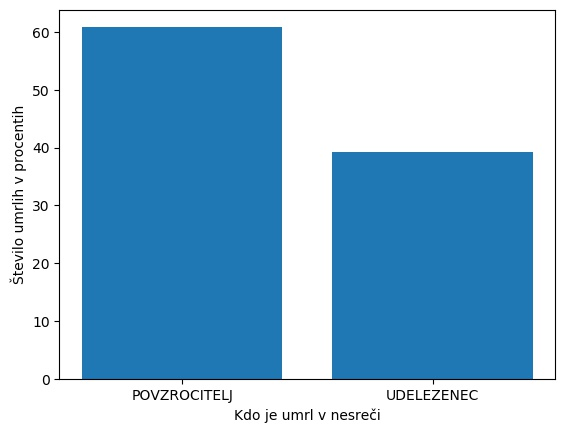

In [37]:
slovar = {}
st_nesrec_smrt = 0
for row in data:
    oseba = row["Povzrocitelj"]
    poskodba = row["PoskodbaUdelezenca"] 
    if(poskodba == "SMRT"):
        st_nesrec_smrt += 1
        if(oseba not in slovar.keys()):
            slovar[oseba] = 1
        else:
            slovar[oseba] += 1
for i, j in slovar.items():
    slovar[i] = (j / st_nesrec_smrt) * 100

plt.bar(slovar.keys(), slovar.values())
plt.xlabel("Kdo je umrl v nesreči")
plt.ylabel("Število umrlih v procentih");

In [38]:
stevec = 0
stevec2 = 0
for row in data:
    oseba = row["Povzrocitelj"]
    starost = row["Starost"]
    if(oseba == "POVZROCITELJ"):
        stevec2 += 1
        if(float(starost) < 21):
            stevec += 1
procent = stevec / stevec2 * 100
print("Procent nesreč kjer je povzročitelj mlajši od 21 let:", procent, "%")

stevec = 0
stevec2 = 0
for row in data:
    oseba = row["Povzrocitelj"]
    starost = row["Starost"]
    poskodba = row["PoskodbaUdelezenca"]
    if(poskodba == "SMRT"):
        if(oseba == "POVZROCITELJ"):
            stevec2 += 1
            if(float(starost) < 21):
                stevec += 1
procent = stevec / stevec2 * 100
print("Procent nesreč s smrtnim izidom kjer je povzročitelj mlajši od 21 let:", procent, "%")

Procent nesreč kjer je povzročitelj mlajši od 21 let: 7.997741814076026 %
Procent nesreč s smrtnim izidom kjer je povzročitelj mlajši od 21 let: 6.451612903225806 %


Procent moskih, ki so povzrocili nesreco: 0.6977645305514159 %
Procent žensk, ki so povzrocile nesreco: 0.3022354694485842 %


Text(0.5, 1.0, 'Števila nesreČ glede na spol povzročitelja')

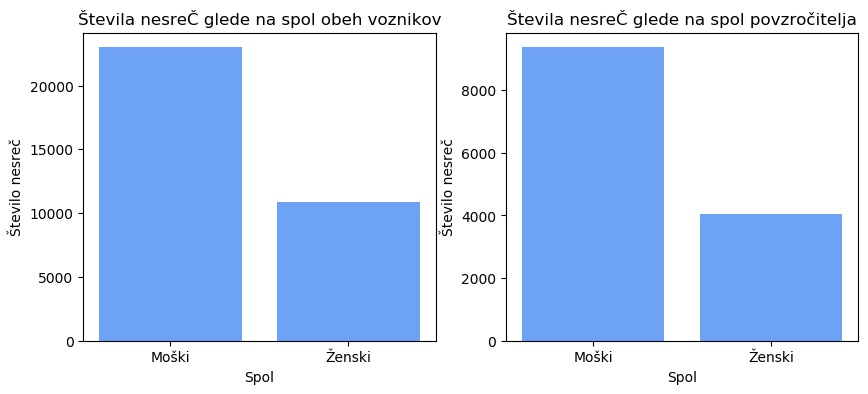

In [39]:
m, z = 0, 0
mP, zP = 0,0
m_z = []
mzP = []

for row in data:
    if(row["Spol"] == "MOSKI"):
        m += 1
        if(row["Povzrocitelj"] == "POVZROCITELJ" and row["Drzavljanstvo"] == "SLOVENIJA"):
            mP += 1
    elif (row["Spol"] == "ZENSKI"):
        z += 1
        if(row["Povzrocitelj"] == "POVZROCITELJ" and row["Drzavljanstvo"] == "SLOVENIJA"):
            zP += 1

m_z.append(m)
m_z.append(z)
mzP.append(mP)
mzP.append(zP)

print("Procent moskih, ki so povzrocili nesreco:", mP / (mP + zP), "%")
print("Procent žensk, ki so povzrocile nesreco:", zP / (mP + zP), "%")

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.bar(["Moški","Ženski"], m_z, color="#6ea2f5");
plt.xlabel("Spol")
plt.ylabel("Število nesreč")
plt.title("Števila nesreČ glede na spol obeh voznikov", fontsize=12)

plt.subplot(1, 2, 2)
plt.bar(["Moški","Ženski"], mzP, color="#6ea2f5");
plt.xlabel("Spol")
plt.ylabel("Število nesreč")
plt.title("Števila nesreČ glede na spol povzročitelja", fontsize=12)

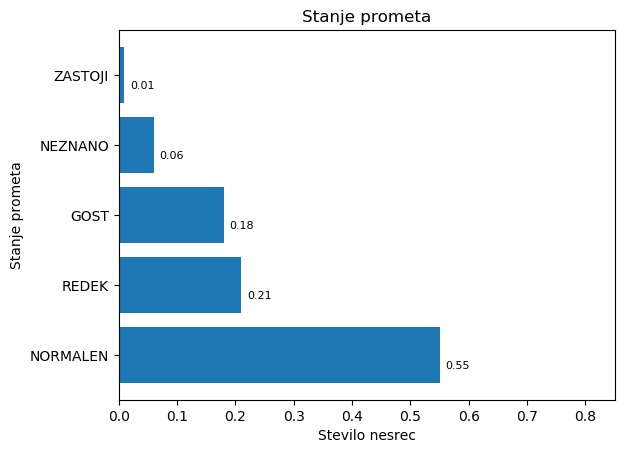

In [40]:
from collections import Counter 

st_nesrec_vreme = dict()
vsi_pogoji = ""
cnt=0

for row in data:
    vsi_pogoji += row["StanjePrometa"]
    if vsi_pogoji not in st_nesrec_vreme.keys():
        st_nesrec_vreme[vsi_pogoji] = 0
    st_nesrec_vreme[vsi_pogoji] += 1
    cnt += 1
    vsi_pogoji = ""

k = Counter(st_nesrec_vreme)  
high = k.most_common(10)

x = [i[0] for i in high]
y = [round(i[1] / cnt, 2) for i in high]


plt.figure()
plt.barh(x, y);
plt.title('Stanje prometa', fontsize=12);
plt.xlabel('Stevilo nesrec');
plt.ylabel('Stanje prometa');
plt.xlim(0, y[0] + 0.3)

for i, v in enumerate(y):
    plt.text(v+0.01, i- 0.20 , str(v), color="black", fontsize=8)

Tip nesreče: CELNO TRCENJE, verjetnost : 0.191
Tip nesreče: PREVRNITEV VOZILA, verjetnost : 0.183
Tip nesreče: BOCNO TRCENJE, verjetnost : 0.166
Tip nesreče: OSTALO, verjetnost : 0.126
Tip nesreče: POVOZENJE PESCA, verjetnost : 0.119
Tip nesreče: TRCENJE V OBJEKT, verjetnost : 0.107
Tip nesreče: NALETNO TRCENJE, verjetnost : 0.057
Tip nesreče: OPLAZENJE, verjetnost : 0.039
Tip nesreče: TRCENJE V STOJECE / PARKIRANO VOZILO, verjetnost : 0.010
Tip nesreče: POVOZENJE ZIVALI, verjetnost : 0.002


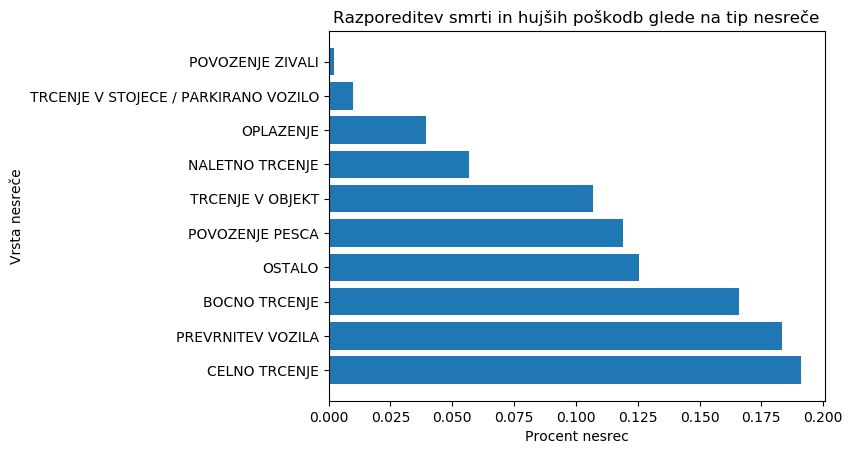

In [41]:
vsePoskodbe = 0
stevecPoskodb = {}
stevecNesrecTrcenje = {}

for row in data:
    if row["TipNesrece"] not in stevecNesrecTrcenje:
        stevecNesrecTrcenje[row["TipNesrece"]] = 1
    else:
        stevecNesrecTrcenje[row["TipNesrece"]] += 1
    
    if row["PoskodbaUdelezenca"] == "SMRT" or row["PoskodbaUdelezenca"] == "HUDA TELESNA POSKODBA":
        if row["TipNesrece"] not in stevecPoskodb.keys():
            stevecPoskodb[row["TipNesrece"]] = 0
        stevecPoskodb[row["TipNesrece"]] += 1
        vsePoskodbe += 1

k = Counter(stevecPoskodb)  
high = k.most_common(10)        
for i in high:
    print("Tip nesreče: %s, verjetnost : %1.3f" % (i[0], i[1] / vsePoskodbe ))
    #print("Tip nesreče: %s, verjetnost : %1.3f" % (i[0], i[1] / stevecNesrecTrcenje[i[0]] ))


plt.barh([i[0] for i in high],[i[1]/vsePoskodbe for i in high])
plt.title('Razporeditev smrti in hujših poškodb glede na tip nesreče', fontsize=12);
plt.xlabel('Procent nesrec');
plt.ylabel('Vrsta nesreče');

Tip nesreče: CELNO TRCENJE, verjetnost : 0.056
Tip nesreče: PREVRNITEV VOZILA, verjetnost : 0.126
Tip nesreče: BOCNO TRCENJE, verjetnost : 0.022
Tip nesreče: OSTALO, verjetnost : 0.040
Tip nesreče: POVOZENJE PESCA, verjetnost : 0.102
Tip nesreče: TRCENJE V OBJEKT, verjetnost : 0.035
Tip nesreče: NALETNO TRCENJE, verjetnost : 0.010
Tip nesreče: OPLAZENJE, verjetnost : 0.008
Tip nesreče: TRCENJE V STOJECE / PARKIRANO VOZILO, verjetnost : 0.002
Tip nesreče: POVOZENJE ZIVALI, verjetnost : 0.007


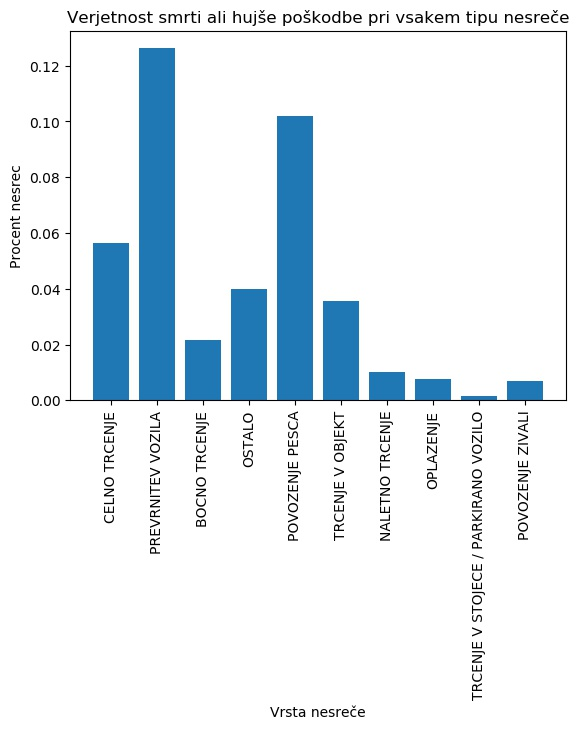

In [42]:
for i in high:
    #print("Tip nesreče: %s, verjetnost : %1.3f" % (i[0], i[1] / vsePoskodbe ))
    print("Tip nesreče: %s, verjetnost : %1.3f" % (i[0], i[1] / stevecNesrecTrcenje[i[0]] ))
plt.bar([i[0] for i in high],[i[1]/stevecNesrecTrcenje[i[0]] for i in high])
plt.title('Verjetnost smrti ali hujše poškodbe pri vsakem tipu nesreče', fontsize=12);
plt.ylabel('Procent nesrec');
plt.gca().set_xticklabels([i[0] for i in high], rotation=90)
plt.xlabel('Vrsta nesreče');

In [43]:
#Stevilo poskodb ce se je celno butnu
stevecPoskodb = {
    'BREZ POSKODBE': 0,
    'LAZJA TELESNA POSKODBA': 0,
    'HUDA TELESNA POSKODBA': 0,
    'SMRT': 0
}
stevecCelniTrcenj = {
    "celnoBrez": 0,
    "celnoLazja": 0,
    "celnoHuda": 0,
    "celnoSmrt":0
}
cntP = 0
cntC = 0

for row in data:
    if row["PoskodbaUdelezenca"] in stevecPoskodb.keys():
        stevecPoskodb[row["PoskodbaUdelezenca"]] += 1
        cntP += 1
        if row["TipNesrece"] == 'CELNO TRCENJE':
            if row["PoskodbaUdelezenca"] == 'BREZ POSKODBE':
                stevecCelniTrcenj["celnoBrez"] += 1
                cntC += 1
            if row["PoskodbaUdelezenca"] == 'HUDA TELESNA POSKODBA':
                stevecCelniTrcenj["celnoHuda"] += 1
                cntC += 1
            if row["PoskodbaUdelezenca"] == 'LAZJA TELESNA POSKODBA':
                stevecCelniTrcenj["celnoLazja"] += 1
                cntC += 1
            if row["PoskodbaUdelezenca"] == 'SMRT':
                stevecCelniTrcenj["celnoSmrt"] += 1
                cntC += 1
    
for poskodbe, trcenje in zip(stevecPoskodb.items(), stevecCelniTrcenj.values()):
    key, value = poskodbe
    x = value / cntP
    y = cntC / cntP
    yx = trcenje / value
    xy = (yx * x) / y
    print("P(X=%s | Y=%s): %f" % (key, "Čelno trčenje", xy))

P(X=BREZ POSKODBE | Y=Čelno trčenje): 0.595779
P(X=LAZJA TELESNA POSKODBA | Y=Čelno trčenje): 0.347403
P(X=HUDA TELESNA POSKODBA | Y=Čelno trčenje): 0.048377
P(X=SMRT | Y=Čelno trčenje): 0.008442


In [44]:
nesrece = {}
cnt=0

for row in data:
    if row["KlasifikacijaNesrece"] not in nesrece:
        nesrece[row["KlasifikacijaNesrece"]] = 0
    nesrece[row["KlasifikacijaNesrece"]] += 1
    cnt += 1
v=0
k=""
for key, value in nesrece.items():
    if value > v:
        v= value
        k=key
print("Večinski razred: %s -> %f " % (k,v/cnt))

Večinski razred: Z MATERIALNO SKODO -> 0.643015 


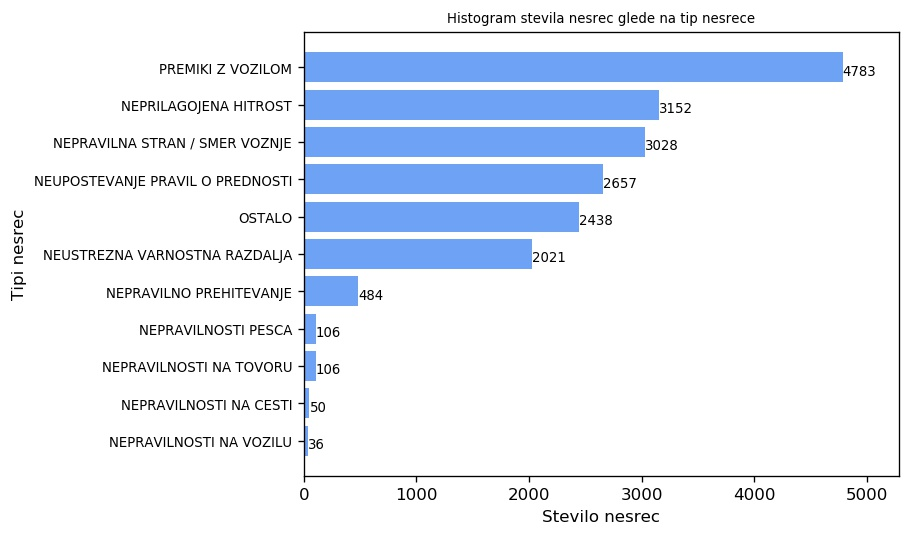

In [49]:
import operator

prejsnja = -1
trenutna = -1
vzroki = dict()
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if trenutna == prejsnja:
        continue
    vzrok = row["VzrokNesrece"]
    if vzrok not in vzroki.keys():
        vzroki[vzrok] = 1
    else:
        vzroki[vzrok] += 1
    prejsnja = trenutna

vzroki = sorted(vzroki.items(), key=operator.itemgetter(1))
x = [i[0] for i in vzroki]
y = [i[1] for i in vzroki]
plt.figure(dpi = 120);
plt.barh(x, y, color="#6ea2f5");
plt.title('Histogram stevila nesrec glede na tip nesrece', fontsize=8);
plt.xlabel('Stevilo nesrec');
plt.ylabel('Tipi nesrec');
plt.xlim(0, y[-1] + 500)
plt.yticks(fontsize=8);
for i, v in enumerate(y):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)

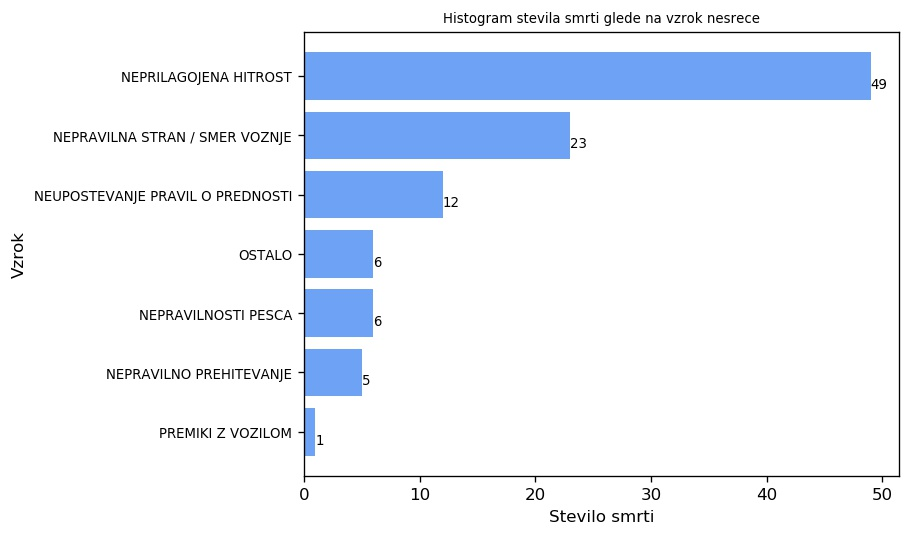

In [50]:
smrti = 0
vsi = 0
vzroki_smrti = dict()

for row in data:
    if row["PoskodbaUdelezenca"] == "SMRT":
        if row["VzrokNesrece"] not in vzroki_smrti.keys():
            vzroki_smrti[row["VzrokNesrece"]] = 0
        vzroki_smrti[row["VzrokNesrece"]] += 1
        
vzroki_smrti_sorted = sorted(vzroki_smrti.items(), key=operator.itemgetter(1))
x = [i[0] for i in vzroki_smrti_sorted]
y = [i[1] for i in vzroki_smrti_sorted]
        
plt.figure(dpi = 120);
plt.barh(x, y, color="#6ea2f5");
plt.title("Histogram stevila smrti glede na vzrok nesrece", fontsize=8)
plt.xlabel('Stevilo smrti');
plt.ylabel('Vzrok');
plt.yticks(fontsize=8);
for i, v in enumerate(y):
    plt.text(v, i - 0.20, str(v), color="black", fontsize=8)

Stevilo izpuscenih vrstic: 8542
Pearsonov koeficient: -0.9504443990473436
MSE: 1832.3218952409165


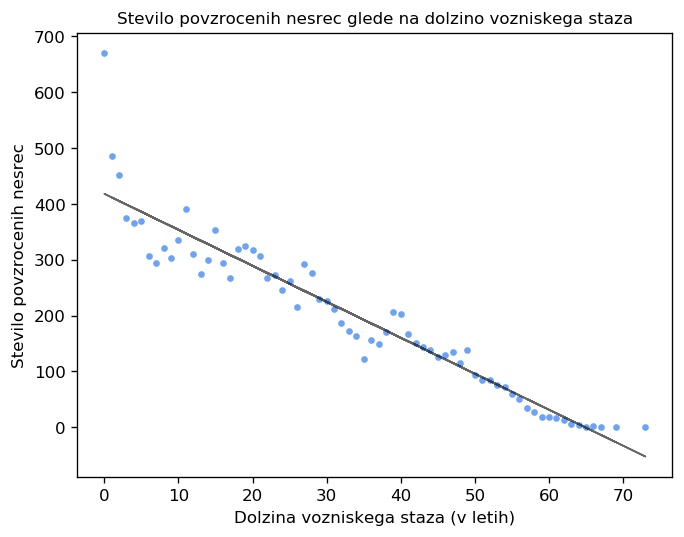

In [51]:
def pearson(x, y):
    return np.mean(((x - np.mean(x))*(y-np.mean(y)))/(np.std(x)*np.std(y)))

staz_nesrece = dict()
st_izpuscenih = 0

for row in data:
    if int(row["VozniskiStazVLetih"]) == 0 and int(row["VozniskiStazVMesecih"]) == 0:
        st_izpuscenih += 1
        continue
    if row["Povzrocitelj"] == "POVZROCITELJ":
        staz = int(row["VozniskiStazVLetih"])
        if staz not in staz_nesrece.keys():
            staz_nesrece[staz] = 0
        staz_nesrece[staz] += 1
        
plt.figure(dpi=120)
plt.plot(list(staz_nesrece.keys()), list(staz_nesrece.values()), ".", color="#6ea2f5")
plt.title('Stevilo povzrocenih nesrec glede na dolzino vozniskega staza', fontsize=10)
plt.xlabel('Dolzina vozniskega staza (v letih)')
plt.ylabel('Stevilo povzrocenih nesrec');

print("Stevilo izpuscenih vrstic:", st_izpuscenih)
print("Pearsonov koeficient:", pearson(list(staz_nesrece.keys()), list(staz_nesrece.values())))

# Regresija
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

x = np.array(list(staz_nesrece.keys()))
y = np.array(list(staz_nesrece.values()))
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

predict = model.predict(x)
plt.plot(x, predict, color='black', linewidth="1", alpha=0.6);
print("MSE:", mean_squared_error(predict, y))

Pearsonov koeficient: -0.5316958289221361
MSE: 87851.76775170672


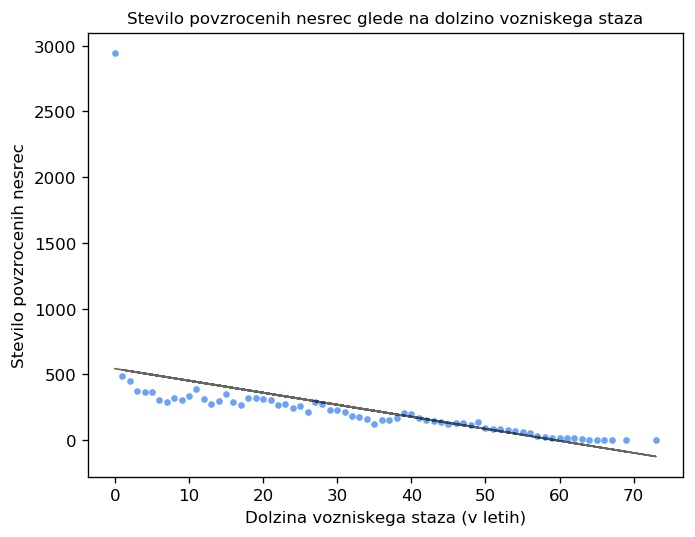

In [52]:
staz_nesrece = dict()

for row in data:
    if row["Povzrocitelj"] == "POVZROCITELJ":
        staz = int(row["VozniskiStazVLetih"])
        if staz not in staz_nesrece.keys():
            staz_nesrece[staz] = 0
        staz_nesrece[staz] += 1
        
plt.figure(dpi=120)
plt.plot(list(staz_nesrece.keys()), list(staz_nesrece.values()), ".", color="#6ea2f5")
plt.title('Stevilo povzrocenih nesrec glede na dolzino vozniskega staza', fontsize=10)
plt.xlabel('Dolzina vozniskega staza (v letih)')
plt.ylabel('Stevilo povzrocenih nesrec');

print("Pearsonov koeficient:", pearson(list(staz_nesrece.keys()), list(staz_nesrece.values())))

# Regresija
x = np.array(list(staz_nesrece.keys()))
y = np.array(list(staz_nesrece.values()))
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LinearRegression()
model.fit(x, y)

predict = model.predict(x)
plt.plot(x, predict, color='black', linewidth="1", alpha=0.6);
print("MSE:", mean_squared_error(predict, y))

In [54]:
koordinate_datum = dict()
koordinate_datum_smrti = dict()
prejsnja = -1
trenutna = -1
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if row["PoskodbaUdelezenca"] == "SMRT":
        datum = int(row["DatumPN"][3:5])
        if datum not in koordinate_datum_smrti.keys():
            koordinate_datum_smrti[datum] = list()
        koordinate_datum_smrti[datum].append((int(row["GeoKoordinataX"]), int(row["GeoKoordinataY"])))
        prejsnja = trenutna
        continue
    if trenutna == prejsnja or (int(row["GeoKoordinataX"]) == 0 and int(row["GeoKoordinataY"]) == 0):
        prejsnja = trenutna
        continue
    datum = int(row["DatumPN"][3:5])
    if datum not in koordinate_datum.keys():
        koordinate_datum[datum] = list()
    koordinate_datum[datum].append((int(row["GeoKoordinataX"]), int(row["GeoKoordinataY"])))
    prejsnja = trenutna

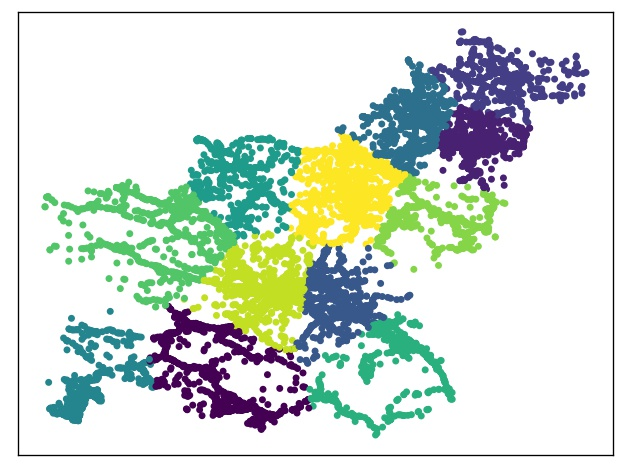

In [55]:
from scipy.cluster.vq import kmeans2, whiten

prejsnja = -1
trenutna = -1
koordinate = list()
for row in data:
    trenutna = int(row["ZaporednaStevilkaPN"])
    if prejsnja == trenutna or int(row["GeoKoordinataX"]) == 0 or int(row["GeoKoordinataY"]) == 0:
        continue
    koordinate.append((int(row["GeoKoordinataX"]), int(row["GeoKoordinataY"])))
    prejsnja = trenutna
    
koordinate_arr = np.array(koordinate)

# K-means Clustering
x, y = kmeans2(whiten(koordinate_arr), 12, iter = 100)  
plt.figure(dpi=120);
plt.scatter(koordinate_arr[:,0], koordinate_arr[:,1], c=y, s=10);
plt.xticks([])
plt.yticks([])
plt.show()

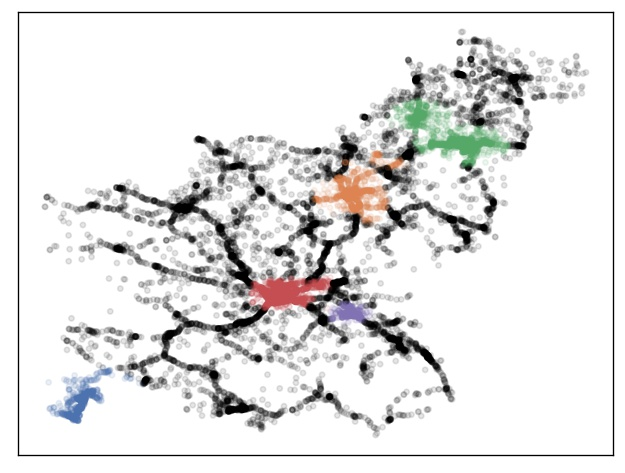

In [56]:
import hdbscan
import seaborn as sns
import sklearn.cluster as cluster

clusterer = hdbscan.HDBSCAN(min_cluster_size=500)
labels = clusterer.fit_predict(koordinate_arr)
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
plt.figure(dpi=120)
plt.scatter(koordinate_arr.T[0], koordinate_arr.T[1], c=colors, s=10, alpha=0.1)
plt.xticks([])
plt.yticks([])
plt.show();

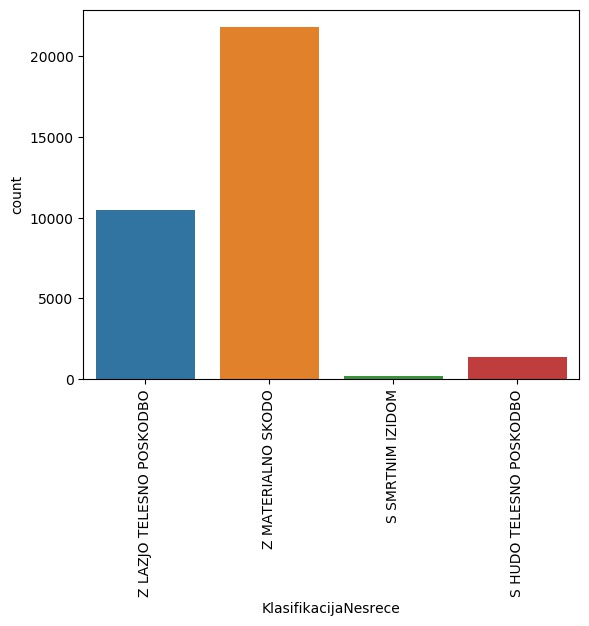

,KlasifikacijaNesrece,UpravnaEnotaStoritve,DatumPN,UraPN,VNaselju,Lokacija,VrstaCesteNaselja,OpisKraja,VzrokNesrece,TipNesrece,VremenskeOkoliscine,StanjePrometa,StanjeVozisca,VrstaVozisca,Povzrocitelj,Starost,Spol,UEStalnegaPrebivalisca,VrstaUdelezenca,UporabaVarnostnegaPasu
0,Z LAZJO TELESNO POSKODBO,LJUBLJANA,08.01.2019,13,DA,NASELJE,NASELJE Z ULICNIM SISTEMOM,KRIZISCE,NEUSTREZNA VARNOSTNA RAZDALJA,TRCENJE V STOJECE / PARKIRANO VOZILO,DEZEVNO,GOST,MOKRO,ZGLAJEN ASFALT / BETON,UDELEZENEC,50,MOSKI,LJUBLJANA,VOZNIK OSEBNEGA AVTOMOBILA,DA
1,Z LAZJO TELESNO POSKODBO,LJUBLJANA,08.01.2019,13,DA,NASELJE,NASELJE Z ULICNIM SISTEMOM,KRIZISCE,NEUSTREZNA VARNOSTNA RAZDALJA,TRCENJE V STOJECE / PARKIRANO VOZILO,DEZEVNO,GOST,MOKRO,ZGLAJEN ASFALT / BETON,POVZROCITELJ,22,ZENSKI,POSTOJNA,VOZNIK OSEBNEGA AVTOMOBILA,DA
2,Z LAZJO TELESNO POSKODBO,LJUBLJANA,02.01.2019,5,DA,NASELJE,NASELJE BREZ ULICNEGA SISTEMA,CESTA,NEPRILAGOJENA HITROST,CELNO TRCENJE,JASNO,REDEK,SPOLZKO,HRAPAV ASFALT / BETON,POVZROCITELJ,47,ZENSKI,LJUBLJANA,VOZNIK OSEBNEGA AVTOMOBILA,DA
3,Z LAZJO TELESNO POSKODBO,LJUBLJANA,02.01.2019,5,DA,NASELJE,NASELJE BREZ ULICNEGA SISTEMA,CESTA,NEPRILAGOJENA HITROST,CELNO TRCENJE,JASNO,REDEK,SPOLZKO,HRAPAV ASFALT / BETON,UDELEZENEC,78,MOSKI,LJUBLJANA,VOZNIK OSEBNEGA AVTOMOBILA,DA
4,Z MATERIALNO SKODO,SMARJE PRI JELSAH,01.01.2019,4,DA,NASELJE,NASELJE BREZ ULICNEGA SISTEMA,CESTA,NEPRILAGOJENA HITROST,BOCNO TRCENJE,OBLACNO,REDEK,MOKRO,ZGLAJEN ASFALT / BETON,POVZROCITELJ,44,MOSKI,SMARJE PRI JELSAH,VOZNIK OSEBNEGA AVTOMOBILA,DA


In [65]:
nesrece = pd.read_csv('podatki/pn2019.csv', sep=";")
nesrece = nesrece.drop(["ZaporednaStevilkaPN", "SifraCesteNaselja", "Drzavljanstvo", "GeoKoordinataX", "GeoKoordinataY", "VozniskiStazVLetih", "VozniskiStazVMesecih", "VrednostAlkotesta", "TekstCesteNaselja", "TekstOdsekaUlice", "SifraOdsekaUlice", "StacionazaDogodka", "ZaporednaStevilkaOsebeVPN", "VrednostStrokovnegaPregleda,,,,", "PoskodbaUdelezenca"], axis=1)

dataset = nesrece.values
# Prikaz podatkov
import seaborn as sns
sns.countplot(nesrece['KlasifikacijaNesrece'],label="Count")
plt.xticks(rotation=90)
plt.show();

nesrece.head()

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

X = dataset[:,1:]
y = dataset[:,0]

X = X.astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return oe, X_train_enc, X_test_enc

def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return le, y_train_enc, y_test_enc

def select_features_chi(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=6)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return fs, X_train_fs, X_test_fs

def select_features_mutual(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=6)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return fs, X_train_fs, X_test_fs

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

"""
# Model zgrajen na vseh atributih
oe, X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
le, y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
yhat = model.predict(X_test_enc)
accuracy = accuracy_score(y_test_enc, yhat)
print('Točnost na vseh podatkih LR: %.2f' % (accuracy*100))

model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(X_train_enc, y_train_enc)
yhat = model.predict(X_test_enc)
accuracy = accuracy_score(y_test_enc, yhat)
print('Točnost na vseh podatkih RF: %.2f' % (accuracy*100))

# Model zgrajen na Chi s k=6
oe, X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
le, y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

fs, X_train_fs, X_test_fs = select_features_chi(X_train_enc, y_train_enc, X_test_enc)
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(X_train_fs, y_train_enc)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, yhat)
print('Točnost na CHI top 6 podatkih RF: %.2f' % (accuracy*100))


# Model zgrajen na Mutual info s k=6
oe, X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
le, y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

fs, X_train_fs, X_test_fs = select_features_mutual(X_train_enc, y_train_enc, X_test_enc)

model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(X_train_fs, y_train_enc)
predict = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, predict)
print('Točnost na Mutual info top 6 podatkih RF: %.2f' % (accuracy*100))
"""

# Najboljši je RF na CHI top 6 atributih, zato napovemo s tem modelom
oe, X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
le, y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

fs, X_train_fs, X_test_fs = select_features_chi(X_train_enc, y_train_enc, X_test_enc)
model = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model.fit(X_train_fs, y_train_enc)
predict = model.predict(X_test_fs)
accuracy = accuracy_score(y_test_enc, yhat)

stolpci = fs.get_support(indices=True)    

df = pd.DataFrame(columns=["OpisKraja", "VzrokNesrece", "TipNesrece", "Starost", "Spol", "VrstaUdelezenca", "Pravi razred", "Napovedan razred"])

count = 0
for info, real, predicted in zip(X_test, y_test, le.inverse_transform(predict)):
    df.loc[count] = [info[6], info[7], info[8], info[14], info[15], info[17], real, predicted]
    count += 1
df.head()

,OpisKraja,VzrokNesrece,TipNesrece,Starost,Spol,VrstaUdelezenca,Pravi razred,Napovedan razred
0,CESTA,NEUSTREZNA VARNOSTNA RAZDALJA,NALETNO TRCENJE,82,ZENSKI,VOZNIK OSEBNEGA AVTOMOBILA,Z MATERIALNO SKODO,Z MATERIALNO SKODO
1,CESTA,NEUSTREZNA VARNOSTNA RAZDALJA,TRCENJE V STOJECE / PARKIRANO VOZILO,67,MOSKI,VOZNIK OSEBNEGA AVTOMOBILA,Z MATERIALNO SKODO,Z MATERIALNO SKODO
2,CESTA,NEPRILAGOJENA HITROST,BOCNO TRCENJE,25,MOSKI,VOZNIK OSEBNEGA AVTOMOBILA,Z LAZJO TELESNO POSKODBO,Z MATERIALNO SKODO
3,CESTA,NEPRAVILNO PREHITEVANJE,BOCNO TRCENJE,48,MOSKI,KOLESAR,Z LAZJO TELESNO POSKODBO,Z LAZJO TELESNO POSKODBO
4,CESTA,NEUPOSTEVANJE PRAVIL O PREDNOSTI,BOCNO TRCENJE,30,ZENSKI,VOZNIK OSEBNEGA AVTOMOBILA,Z MATERIALNO SKODO,Z MATERIALNO SKODO


Točnost na vseh podatkih LR: 68.08

Točnost na vseh podatkih RF: 72.93

Točnost na CHI top 6 podatkih RF: 73.54

Točnost na Mutual info top 6 podatkih RF: 73.20

In [69]:
"""
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

X_test = X_test_enc
y_test = y_test_enc
X_tr = X_train_enc
y_tr = y_train_enc

# Različni modeli
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_tr, y_tr)
LR.predict(X_test)
print(round(LR.score(X_test,y_test), 4))

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(X_tr, y_tr)
RF.predict(X_test)
print(round(RF.score(X_test, y_test), 4))

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(X_tr, y_tr)
NN.predict(X_test)
print(round(NN.score(X_test, y_test), 4))
"""
pass

Točnost LR: 0.6791

Točnost RF: 0.7293

Točnost MLP: 0.6368

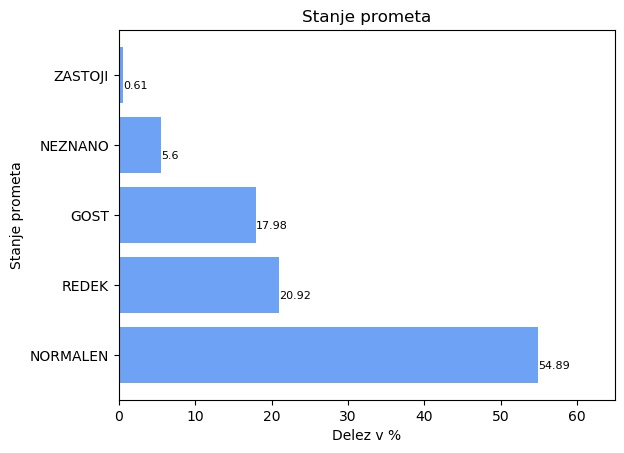

In [70]:
from collections import Counter 

st_nesrec_vreme = dict()
vsi_pogoji = ""
cnt=0

for row in data:
    vsi_pogoji += row["StanjePrometa"]
    if vsi_pogoji not in st_nesrec_vreme.keys():
        st_nesrec_vreme[vsi_pogoji] = 0
    st_nesrec_vreme[vsi_pogoji] += 1
    cnt += 1
    vsi_pogoji = ""

k = Counter(st_nesrec_vreme)  
high = k.most_common(10)

x = [i[0] for i in high]
y = [round((i[1] / cnt)*100, 2) for i in high]


plt.figure()
plt.barh(x, y, color="#6ea2f5");
plt.title('Stanje prometa', fontsize=12);
plt.xlabel('Delez v %');
plt.ylabel('Stanje prometa');
plt.xlim(0, y[0] + 10)

for i, v in enumerate(y):
    plt.text(v+0.01, i- 0.20 , str(v), color="black", fontsize=8)